# Introduction

In this exploratory data analysis (EDA), we examine bus ridership patterns across various routes in Israel, using a comprehensive dataset provided by [Data.gov.il](https://data.gov.il/dataset/ridership/resource/e6cfac2f-979a-44fd-b439-ecb116ec0b16). The dataset, titled "קובץ נסועה בקווי אוטובוס שנת 2024," contains detailed records of bus ridership for the year 2024, including route types, service types, city pairings, and passenger counts segmented by time and day.

Our goal with this analysis is to uncover critical insights that shed light on passenger trends, route utilization, and service types within Israel’s public transportation network. By focusing on key aspects like peak times, busiest routes, and service types, we aim to identify areas for potential improvement in public transit resource allocation and operational efficiency.

To enhance our analysis, we utilized additional resources such as [Yuvadm’s Geolocation Data](https://github.com/yuvadm/geolocations-il/tree/master) for mapping and geolocation insights. This allowed us to accurately represent city pairings and route-specific information, adding geographical context to our findings.

Furthermore, our findings have been visually presented in an interactive dashboard available on [Tableau Public](https://public.tableau.com/app/profile/amir.khier/viz/DashboardBus1/Dashboard1), where you can explore bus ridership patterns in greater detail.

This dataset was chosen due to its depth and breadth, allowing us to explore public transportation dynamics from multiple perspectives. The insights derived from this EDA can provide valuable input for optimizing transit planning and improving the daily commuting experience for the population.

This analysis was conducted by our team members:
- **Kareen Ghattas**
- **Amir Khier**
- **Tawfiq Musa**

Through this collaborative effort, we leveraged diverse perspectives and analytical skills to generate meaningful findings from the data. The following sections provide a breakdown of our analysis, detailing our approach, key findings, and interpretations.


# **Importing Libaries :**

In [35]:
!pip install thefuzz

In [36]:
!pip install python-bidi

In [37]:
!pip install pingouin

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
from bidi.algorithm import get_display
import pingouin as pg
import plotly.express as px
from thefuzz import process
warnings.filterwarnings('ignore')

# **Loading The Dataset By Pandas :**

In [39]:
Bus_dataframe = pd.read_csv('BusData.csv')

# **Take a look a Brief About DataSet :**

In [40]:
Bus_dataframe.head()

RouteID  RouteName  RouteDirection AgencyName  ClusterName      Metropolin  \
0    10003          3               1        אגד  חיפה עירוני  מטרופולין חיפה   
1    10006          6               1        אגד  חיפה עירוני  מטרופולין חיפה   
2    10006          6               3        אגד  חיפה עירוני  מטרופולין חיפה   
3    10007          7               1        אגד  חיפה עירוני  מטרופולין חיפה   
4    10007          7               2        אגד  חיפה עירוני  מטרופולין חיפה   

  OriginCityName DestinationCityName RouteType ServiceType  ...  \
0          רכסים               רכסים    עירוני  מקומי מאסף  ...   
1           חיפה                חיפה    עירוני  מקומי מאסף  ...   
2           חיפה                חיפה    עירוני  מקומי מאסף  ...   
3           חיפה                 נשר    עירוני  מקומי מאסף  ...   
4            נשר                חיפה    עירוני  מקומי מאסף  ...   

  Saturday - 00:00-03:59 Saturday - 04:00-05:59 Saturday - 06:00-08:59  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

   Saturday - 09:00-11:59  Saturday - 12:00-14:59  Saturday - 15:00-18:59  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
4                     NaN                     NaN                     NaN   

   Saturday - 19:00-23:59           MaxRidership  year  Q  
0                     NaN     שישי - 06:00-08:59  2024  1  
1                     NaN  ימי חול - 06:00-08:59  2024  1  
2                     NaN  ימי חול - 12:00-14:59  2024  1  
3                     NaN  ימי חול - 06:00-08:59  2024  1  
4                     NaN  ימי חול - 15:00-18:59  2024  1  

[5 rows x 53 columns]

## **Brief About Columns :(We Relieze That's There's null columns)**

In [41]:
Bus_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10678 entries, 0 to 10677
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RouteID                      10678 non-null  int64  
 1   RouteName                    10678 non-null  int64  
 2   RouteDirection               10678 non-null  int64  
 3   AgencyName                   10678 non-null  object 
 4   ClusterName                  10678 non-null  object 
 5   Metropolin                   10678 non-null  object 
 6   OriginCityName               10678 non-null  object 
 7   DestinationCityName          10678 non-null  object 
 8   RouteType                    10678 non-null  object 
 9   ServiceType                  10678 non-null  object 
 10  RouteParticular              10678 non-null  object 
 11  BusType                      10678 non-null  object 
 12  BusSize                      10678 non-null  object 
 13  NumOfAlternative

In [42]:
Bus_dataframe.describe()

RouteID     RouteName  RouteDirection  NumOfAlternatives  \
count  10678.000000  10678.000000    10678.000000       10678.000000   
mean   22747.784323    216.261566        1.565087           1.287320   
std    16482.081207    255.667041        0.579719           0.972243   
min    10003.000000      1.000000        1.000000           1.000000   
25%    11437.000000     33.000000        1.000000           1.000000   
50%    16025.000000     91.000000        2.000000           1.000000   
75%    28051.000000    325.000000        2.000000           1.000000   
max    99005.000000    999.000000        3.000000          42.000000   

        RouteLength      WeeklyKM  AVGPassengersPerWeek  StationsInRoute  \
count  10678.000000  10678.000000          10667.000000     10678.000000   
mean      33.923918   2792.904786              0.978616        33.893707   
std       40.237157   3490.708649              1.506415        15.872615   
min        0.600000      2.800000              0.000000         1.000000   
25%       11.800000    376.675000              0.200000        23.000000   
50%       21.400000   1626.150000              0.400000        32.000000   
75%       40.200000   3873.850000              1.300000        43.000000   
max      446.200000  31167.100000             31.000000       113.000000   

       UniqueStations  AverageSpeed  ...  Friday - 19:00-23:59  \
count     3501.000000  10675.000000  ...            209.000000   
mean         6.344473     31.003548  ...              7.078469   
std          7.877936     13.684492  ...             10.886780   
min          1.000000      5.300000  ...              0.000000   
25%          1.000000     20.590000  ...              1.300000   
50%          3.000000     27.500000  ...              3.300000   
75%          8.000000     38.765000  ...              8.400000   
max         91.000000     87.750000  ...             74.200000   

       Saturday - 00:00-03:59  Saturday - 04:00-05:59  Saturday - 06:00-08:59  \
count             1170.000000              162.000000              418.000000   
mean                 0.381966                1.502469                7.522727   
std                  2.728086                3.833053               11.031180   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                1.300000   
50%                  0.000000                0.100000                3.500000   
75%                  0.000000                0.800000                7.500000   
max                 47.200000               32.500000               67.300000   

       Saturday - 09:00-11:59  Saturday - 12:00-14:59  Saturday - 15:00-18:59  \
count              418.000000              496.000000             1430.000000   
mean                 9.458612               15.850806               10.107273   
std                 12.908196               22.506470               12.244700   
min                  0.000000                0.000000                0.000000   
25%                  1.800000                2.975000                1.300000   
50%                  4.600000                7.900000                5.700000   
75%                 10.675000               17.100000               15.775000   
max                 92.600000              178.700000              107.500000   

       Saturday - 19:00-23:59     year             Q  
count             5127.000000  10678.0  10678.000000  
mean                11.356037   2024.0      1.501217  
std                 11.639197      0.0      0.500022  
min                  0.000000   2024.0      1.000000  
25%                  2.600000   2024.0      1.000000  
50%                  7.800000   2024.0      2.000000  
75%                 17.200000   2024.0      2.000000  
max                129.800000   2024.0      2.000000  

[8 rows x 40 columns]

In [43]:
Bus_dataframe.describe(include='object')

AgencyName ClusterName Metropolin OriginCityName DestinationCityName  \
count       10678       10678      10678          10678               10678   
unique         29          68          8            467                 464   
top           אגד    חשמונאים        י-ם        ירושלים             ירושלים   
freq         2250         830       2266           1312                1314   

       RouteType ServiceType RouteParticular BusType  BusSize OperationSince  \
count      10678       10678           10678   10678    10678          10678   
unique         3           6               5       4        5             19   
top       עירוני  מקומי מאסף            סדיר  עירוני  אוטובוס   מעל שנה וחצי   
freq        5064        4978            8437    5176     8838          10162   

       UniqueLocations           MaxRidership  
count              718                  10678  
unique             308                     20  
top           אבן ספיר  ימי חול - 12:00-14:59  
freq                 6                   4681

# **Size of Rows and col in Dataset**

In [44]:
Bus_dataframe.shape

(10678, 53)

# **Checking The missing Data :**

In [45]:
checkNull = Bus_dataframe.isnull().sum()
checkNull[checkNull != 0]

AVGPassengersPerWeek              11
UniqueStations                  7177
UniqueLocations                 9960
AverageSpeed                       3
AverageTripDuration                3
OperatingCostPerPassenger         14
DailyPassengers                   11
WeeklyPassengers                  11
AVGCommutersPerRide(Weekly)       11
WorkDay - 00:00-03:59           9680
WorkDay - 04:00-05:59           6517
WorkDay - 06:00-08:59           2788
WorkDay - 09:00-11:59           4058
WorkDay - 12:00-14:59           3012
WorkDay - 15:00-18:59           3101
WorkDay - 19:00-23:59           4281
Friday - 00:00-03:59           10640
Friday - 04:00-05:59            7743
Friday - 06:00-08:59            4090
Friday - 09:00-11:59            4324
Friday - 12:00-14:59            4029
Friday - 15:00-18:59            7912
Friday - 19:00-23:59           10469
Saturday - 00:00-03:59          9508
Saturday - 04:00-05:59         10516
Saturday - 06:00-08:59         10260
Saturday - 09:00-11:59         10260
Saturday - 12:00-14:59         10182
Saturday - 15:00-18:59          9248
Saturday - 19:00-23:59          5551
dtype: int64

In [46]:
MissingCols = list(checkNull[checkNull != 0].index)
MissingCols

['AVGPassengersPerWeek',
 'UniqueStations',
 'UniqueLocations',
 'AverageSpeed',
 'AverageTripDuration',
 'OperatingCostPerPassenger',
 'DailyPassengers',
 'WeeklyPassengers',
 'AVGCommutersPerRide(Weekly)',
 'WorkDay - 00:00-03:59',
 'WorkDay - 04:00-05:59',
 'WorkDay - 06:00-08:59',
 'WorkDay - 09:00-11:59',
 'WorkDay - 12:00-14:59',
 'WorkDay - 15:00-18:59',
 'WorkDay - 19:00-23:59',
 'Friday - 00:00-03:59',
 'Friday - 04:00-05:59',
 'Friday - 06:00-08:59',
 'Friday - 09:00-11:59',
 'Friday - 12:00-14:59',
 'Friday - 15:00-18:59',
 'Friday - 19:00-23:59',
 'Saturday - 00:00-03:59',
 'Saturday - 04:00-05:59',
 'Saturday - 06:00-08:59',
 'Saturday - 09:00-11:59',
 'Saturday - 12:00-14:59',
 'Saturday - 15:00-18:59',
 'Saturday - 19:00-23:59']

**Taking alook about Missing Values That Columns have**

In [47]:
Bus_dataframe[MissingCols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10678 entries, 0 to 10677
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AVGPassengersPerWeek         10667 non-null  float64
 1   UniqueStations               3501 non-null   float64
 2   UniqueLocations              718 non-null    object 
 3   AverageSpeed                 10675 non-null  float64
 4   AverageTripDuration          10675 non-null  float64
 5   OperatingCostPerPassenger    10664 non-null  float64
 6   DailyPassengers              10667 non-null  float64
 7   WeeklyPassengers             10667 non-null  float64
 8   AVGCommutersPerRide(Weekly)  10667 non-null  float64
 9   WorkDay - 00:00-03:59        998 non-null    float64
 10  WorkDay - 04:00-05:59        4161 non-null   float64
 11  WorkDay - 06:00-08:59        7890 non-null   float64
 12  WorkDay - 09:00-11:59        6620 non-null   float64
 13  WorkDay - 12:00-

**Checking count values of UniqueLocations object column**

In [48]:
Bus_dataframe['UniqueLocations'].value_counts()

UniqueLocations
אבן ספיר                     6
גבעות בר                     4
ניצן ב', ניצן                4
ביר הדאג'                    4
אחיעזר                       4
                            ..
אום אל קוטוף, מצפה אילן      1
תקומה, זמרת, תושיה, שוקדה    1
שחרות, נאות סמדר             1
נאות סמדר, שחרות             1
שוקדה, תושיה, זמרת, תקומה    1
Name: count, Length: 308, dtype: int64

**Removing UniqueLocation , UniqueStations Because these Columns Are useless for visualization**

In [49]:
Bus_dataframe.drop(columns=['UniqueLocations','UniqueStations'],inplace=True)


In [50]:
MissingCols.remove('UniqueLocations')
MissingCols.remove('UniqueStations')

## **Imputing Missing Values to 0:**

**Note**: *Currently All the Missing Values are belong to float Columns*

We're going to Impute All Values to 0

In [51]:
#defing Imputing Function to avoid missing values :
def ImputeNumericValuestoZero(df,Cols):
  for col in Cols:
    df[col].replace(to_replace=np.NaN,value=0,inplace=True)

ImputeNumericValuestoZero(Bus_dataframe,MissingCols)
Bus_dataframe.isnull().sum()

RouteID                        0
RouteName                      0
RouteDirection                 0
AgencyName                     0
ClusterName                    0
Metropolin                     0
OriginCityName                 0
DestinationCityName            0
RouteType                      0
ServiceType                    0
RouteParticular                0
BusType                        0
BusSize                        0
NumOfAlternatives              0
RouteLength                    0
WeeklyKM                       0
AVGPassengersPerWeek           0
StationsInRoute                0
OperationSince                 0
AverageSpeed                   0
AverageTripDuration            0
OperatingCostPerPassenger      0
DailyRides(Tuesday)            0
WeekyRides                     0
DailyPassengers                0
WeeklyPassengers               0
AVGCommutersPerRide(Weekly)    0
WorkDay - 00:00-03:59          0
WorkDay - 04:00-05:59          0
WorkDay - 06:00-08:59          0
WorkDay - 09:00-11:59          0
WorkDay - 12:00-14:59          0
WorkDay - 15:00-18:59          0
WorkDay - 19:00-23:59          0
Friday - 00:00-03:59           0
Friday - 04:00-05:59           0
Friday - 06:00-08:59           0
Friday - 09:00-11:59           0
Friday - 12:00-14:59           0
Friday - 15:00-18:59           0
Friday - 19:00-23:59           0
Saturday - 00:00-03:59         0
Saturday - 04:00-05:59         0
Saturday - 06:00-08:59         0
Saturday - 09:00-11:59         0
Saturday - 12:00-14:59         0
Saturday - 15:00-18:59         0
Saturday - 19:00-23:59         0
MaxRidership                   0
year                           0
Q                              0
dtype: int64

# **Data Preproccesing**

In [52]:
Bus_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10678 entries, 0 to 10677
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RouteID                      10678 non-null  int64  
 1   RouteName                    10678 non-null  int64  
 2   RouteDirection               10678 non-null  int64  
 3   AgencyName                   10678 non-null  object 
 4   ClusterName                  10678 non-null  object 
 5   Metropolin                   10678 non-null  object 
 6   OriginCityName               10678 non-null  object 
 7   DestinationCityName          10678 non-null  object 
 8   RouteType                    10678 non-null  object 
 9   ServiceType                  10678 non-null  object 
 10  RouteParticular              10678 non-null  object 
 11  BusType                      10678 non-null  object 
 12  BusSize                      10678 non-null  object 
 13  NumOfAlternative

In [53]:

Bus_dataframe['BusID'] = pd.Series([i for i in range(Bus_dataframe.shape[0])])
Bus_dataframe['BusID']

# Move 'PrimaryKey' to the first position
cols = ['BusID'] + [col for col in Bus_dataframe.columns if col != 'BusID']
Bus_dataframe = Bus_dataframe[cols]
Bus_dataframe


BusID  RouteID  RouteName  RouteDirection AgencyName  ClusterName  \
0          0    10003          3               1        אגד  חיפה עירוני   
1          1    10006          6               1        אגד  חיפה עירוני   
2          2    10006          6               3        אגד  חיפה עירוני   
3          3    10007          7               1        אגד  חיפה עירוני   
4          4    10007          7               2        אגד  חיפה עירוני   
...      ...      ...        ...             ...        ...          ...   
10673  10673    98005          5               2   דן בדרום    צפון הנגב   
10674  10674    99002          2               1         דן      תל אביב   
10675  10675    99002          2               2         דן      תל אביב   
10676  10676    99005          5               1    סופרבוס       העמקים   
10677  10677    99005          5               2    סופרבוס       העמקים   

             Metropolin OriginCityName DestinationCityName RouteType  ...  \
0        מטרופולין חיפה          רכסים               רכסים    עירוני  ...   
1        מטרופולין חיפה           חיפה                חיפה    עירוני  ...   
2        מטרופולין חיפה           חיפה                חיפה    עירוני  ...   
3        מטרופולין חיפה           חיפה                 נשר    עירוני  ...   
4        מטרופולין חיפה            נשר                חיפה    עירוני  ...   
...                 ...            ...                 ...       ...  ...   
10673             הדרום        קרית גת             קרית גת    עירוני  ...   
10674            גוש דן    תל אביב יפו         תל אביב יפו    עירוני  ...   
10675            גוש דן    תל אביב יפו         תל אביב יפו    עירוני  ...   
10676  גולן גליל ועמקים          עפולה               עפולה    עירוני  ...   
10677  גולן גליל ועמקים          עפולה               עפולה    עירוני  ...   

      Saturday - 00:00-03:59 Saturday - 04:00-05:59 Saturday - 06:00-08:59  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
10673                    0.0                    0.0                    0.0   
10674                    0.0                    0.0                    0.0   
10675                    0.0                    0.0                    0.0   
10676                    0.0                    0.0                    0.0   
10677                    0.0                    0.0                    0.0   

      Saturday - 09:00-11:59  Saturday - 12:00-14:59  Saturday - 15:00-18:59  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   
...                      ...                     ...                     ...   
10673                    0.0                     0.0                     0.0   
10674                    0.0                     0.0                     0.0   
10675                    0.0                     0.0                     0.0   
10676                    0.0                     0.0                     0.0   
10677                    0.0                     0.0                     0.0   

       Saturday - 19:00-23:59           MaxRidership  year  Q  
0                         0.0     שישי - 06:00-08:59  2024  1  
1                         0.0  ימי חול - 06:00-08:59  2024  1  
2                         0.0  ימי חול - 12:00-14:59  2024  1  
3              

## **Transforming Cities Names to Longititude and Latitdude -> Generating GeoLocation Dataset(GIS Analysis - GeoCoding)**

In [54]:
# Load cities data
#Getting Israeli GeoLocation of cities dataset from github
cities = pd.read_csv('https://raw.githubusercontent.com/yuvadm/geolocations-il/refs/heads/master/cities.csv')

# Ensure required columns exist
if not {'City', 'Latitude', 'Longitude'}.issubset(cities.columns):
    raise ValueError("Cities CSV must contain 'City', 'Latitude', and 'Longitude' columns.")

# Create dictionaries for latitude and longitude
city_to_lat = cities.set_index('City')['Latitude'].to_dict()
city_to_lon = cities.set_index('City')['Longitude'].to_dict()

# Define Israel's districts with approximate latitude and longitude ranges
districts = [
    {'District': 'Northern', 'min_lat': 32.5, 'max_lat': 33.3, 'min_lon': 35.0, 'max_lon': 35.7},
    {'District': 'Haifa', 'min_lat': 32.0, 'max_lat': 32.5, 'min_lon': 34.7, 'max_lon': 35.1},
    {'District': 'Central', 'min_lat': 31.8, 'max_lat': 32.2, 'min_lon': 34.7, 'max_lon': 35.0},
    {'District': 'Tel Aviv', 'min_lat': 32.0, 'max_lat': 32.1, 'min_lon': 34.7, 'max_lon': 34.9},
    {'District': 'Jerusalem', 'min_lat': 31.7, 'max_lat': 31.9, 'min_lon': 35.1, 'max_lon': 35.3},
    {'District': 'Southern', 'min_lat': 29.5, 'max_lat': 31.7, 'min_lon': 34.3, 'max_lon': 35.3}
]

# Helper function to find the district based on latitude and longitude
def get_district(lat, lon):
    for district in districts:
        if (district['min_lat'] <= lat <= district['max_lat']) and (district['min_lon'] <= lon <= district['max_lon']):
            return district['District']
    return 'Unknown'  # Default if no district matches

# Fuzzy matching for potential spelling errors in city names
def get_closest_match(city_name, city_list, threshold=80):
    match, score = process.extractOne(city_name, city_list)
    if score >= threshold:
        return match  # Return the closest match if it meets the threshold
    return None  # Return None if no good match found

# Get unique city names from Bus_dataframe
origin_city_unique = Bus_dataframe['OriginCityName'].unique()
dest_city_unique = Bus_dataframe['DestinationCityName'].unique()

# List of valid city names from cities.csv
cities_list = list(cities['City'])

# Apply fuzzy matching to correct city names
Bus_dataframe['OriginCityName_Corrected'] = Bus_dataframe['OriginCityName'].apply(
    lambda x: get_closest_match(x, cities_list) or x
)
Bus_dataframe['DestinationCityName_Corrected'] = Bus_dataframe['DestinationCityName'].apply(
    lambda x: get_closest_match(x, cities_list) or x
)

# Create GeoLocation DataFrame with corrected city names
GeoLocation = pd.DataFrame()
GeoLocation['OriginCityName'] = Bus_dataframe['OriginCityName_Corrected']
GeoLocation['DestinationCityName'] = Bus_dataframe['DestinationCityName_Corrected']

# Map latitudes and longitudes
GeoLocation['OriginCityName_Latitude'] = GeoLocation['OriginCityName'].map(city_to_lat)
GeoLocation['OriginCityName_Longitude'] = GeoLocation['OriginCityName'].map(city_to_lon)
GeoLocation['DestinationCityName_Latitude'] = GeoLocation['DestinationCityName'].map(city_to_lat)
GeoLocation['DestinationCityName_Longitude'] = GeoLocation['DestinationCityName'].map(city_to_lon)

# Add passenger and BusID data
GeoLocation['WeeklyPassengers'] = Bus_dataframe['WeeklyPassengers']
GeoLocation['DailyPassengers'] = Bus_dataframe['DailyPassengers']
GeoLocation['BusID'] = Bus_dataframe['BusID']

# Drop rows with missing latitude/longitude data
GeoLocation.dropna(inplace=True)

# Filter by Israel's latitude/longitude range
min_lat, max_lat = 29.5, 33.3  # Latitude range of Israel
min_lon, max_lon = 34.0, 35.7  # Longitude range of Israel

GeoLocation = GeoLocation[
    (GeoLocation['OriginCityName_Latitude'].between(min_lat, max_lat)) &
    (GeoLocation['OriginCityName_Longitude'].between(min_lon, max_lon)) &
    (GeoLocation['DestinationCityName_Latitude'].between(min_lat, max_lat)) &
    (GeoLocation['DestinationCityName_Longitude'].between(min_lon, max_lon))
]

# Add district columns based on latitude and longitude
GeoLocation['OriginDistrict'] = GeoLocation.apply(
    lambda row: get_district(row['OriginCityName_Latitude'], row['OriginCityName_Longitude']), axis=1
)
GeoLocation['DestinationDistrict'] = GeoLocation.apply(
    lambda row: get_district(row['DestinationCityName_Latitude'], row['DestinationCityName_Longitude']), axis=1
)
GeoLocation['Country'] = 'Israel'




## **Dividing the dataset into to 2 datasets:**


*   PublicTransitRoutesData(Original Data)
*   BusPassengerTimeSlots(Based on WorkDay and Weekend Time Slots Columns)





In [55]:
columns = [
    'BusID','RouteID', 'AgencyName', 'ClusterName', 'Metropolin', 'OriginCityName', 'DestinationCityName',
    'RouteType', 'ServiceType', 'RouteParticular', 'BusType', 'BusSize',
    'WorkDay - 00:00-03:59', 'WorkDay - 04:00-05:59', 'WorkDay - 06:00-08:59', 'WorkDay - 09:00-11:59',
    'WorkDay - 12:00-14:59', 'WorkDay - 15:00-18:59', 'WorkDay - 19:00-23:59',
    'Friday - 00:00-03:59', 'Friday - 04:00-05:59', 'Friday - 06:00-08:59', 'Friday - 09:00-11:59',
    'Friday - 12:00-14:59', 'Friday - 15:00-18:59', 'Friday - 19:00-23:59',
    'Saturday - 00:00-03:59', 'Saturday - 04:00-05:59', 'Saturday - 06:00-08:59', 'Saturday - 09:00-11:59',
    'Saturday - 12:00-14:59', 'Saturday - 15:00-18:59', 'Saturday - 19:00-23:59','Q'
]

# Columns to keep before melting
id_vars = ['BusID','RouteID', 'AgencyName', 'ClusterName', 'Metropolin', 'OriginCityName',
           'DestinationCityName', 'RouteType', 'ServiceType', 'RouteParticular',
           'BusType', 'BusSize','Q']

# Melt the DataFrame
melted_df = pd.melt(Bus_dataframe[columns], id_vars=id_vars,
                    value_vars=[col for col in Bus_dataframe[columns].columns if 'WorkDay' in col or 'Friday' in col or 'Saturday' in col],
                    var_name='TimeSlot', value_name='Passengers')

# Extract day type (WorkDay, Friday, or Saturday) and time slot from the 'TimeSlot' column
melted_df['DayType'] = melted_df['TimeSlot'].apply(lambda x: 'WorkDay' if 'WorkDay' in x else ('Friday' if 'Friday' in x else 'Saturday'))
melted_df['TimeSlot'] = melted_df['TimeSlot'].apply(lambda x: x.split(' - ')[1])

# Assign the DayType to Category (WorkDay, Friday, or Saturday)
melted_df['Category'] = melted_df['DayType']  # Now it will have WorkDay, Friday, or Saturday explicitly

# Drop the old 'DayType' column, since it's now represented in the 'Category'
BusPassengerTimeSlots = melted_df.drop(columns=['DayType'])

# Display the transformed dataframe
BusPassengerTimeSlots

BusID  RouteID AgencyName  ClusterName        Metropolin  \
0           0    10003        אגד  חיפה עירוני    מטרופולין חיפה   
1           1    10006        אגד  חיפה עירוני    מטרופולין חיפה   
2           2    10006        אגד  חיפה עירוני    מטרופולין חיפה   
3           3    10007        אגד  חיפה עירוני    מטרופולין חיפה   
4           4    10007        אגד  חיפה עירוני    מטרופולין חיפה   
...       ...      ...        ...          ...               ...   
224233  10673    98005   דן בדרום    צפון הנגב             הדרום   
224234  10674    99002         דן      תל אביב            גוש דן   
224235  10675    99002         דן      תל אביב            גוש דן   
224236  10676    99005    סופרבוס       העמקים  גולן גליל ועמקים   
224237  10677    99005    סופרבוס       העמקים  גולן גליל ועמקים   

       OriginCityName DestinationCityName RouteType ServiceType  \
0               רכסים               רכסים    עירוני  מקומי מאסף   
1                חיפה                חיפה    עירוני  מקומי מאסף   
2                חיפה                חיפה    עירוני  מקומי מאסף   
3                חיפה                 נשר    עירוני  מקומי מאסף   
4                 נשר                חיפה    עירוני  מקומי מאסף   
...               ...                 ...       ...         ...   
224233        קרית גת             קרית גת    עירוני  מקומי מאסף   
224234    תל אביב יפו         תל אביב יפו    עירוני  מקומי מאסף   
224235    תל אביב יפו         תל אביב יפו    עירוני  מקומי מאסף   
224236          עפולה               עפולה    עירוני  מקומי מאסף   
224237          עפולה               עפולה    עירוני  מקומי מאסף   

       RouteParticular BusType  BusSize  Q     TimeSlot  Passengers  Category  
0              תלמידים  עירוני  אוטובוס  1  00:00-03:59         0.0   WorkDay  
1              תלמידים  עירוני  אוטובוס  1  00:00-03:59         0.0   WorkDay  
2                 סדיר  עירוני  מיניבוס  1  00:00-03:59         0.0   WorkDay  
3                 סדיר  עירוני  אוטובוס  1  00:00-03:59         0.0   WorkDay  
4                 סדיר  עירוני  אוטובוס  1  00:00-03:59         0.0   WorkDay  
...                ...     ...      ... ..          ...         ...       ...  
224233            סדיר  עירוני  אוטובוס  2  19:00-23:59         5.7  Saturday  
224234            סדיר  עירוני  אוטובוס  2  19:00-23:59        18.2  Saturday  
224235            סדיר  עירוני  אוטובוס  2  19:00-23:59        18.9  Saturday  
224236            סדיר  עירוני  אוטובוס  2  19:00-23:59         4.5  Saturday  
224237            סדיר  עירוני  אוטובוס  2  19:00-23:59         4.5  Saturday  

[224238 rows x 16 columns]

In [56]:
BusPassengerTimeSlots

BusID  RouteID AgencyName  ClusterName        Metropolin  \
0           0    10003        אגד  חיפה עירוני    מטרופולין חיפה   
1           1    10006        אגד  חיפה עירוני    מטרופולין חיפה   
2           2    10006        אגד  חיפה עירוני    מטרופולין חיפה   
3           3    10007        אגד  חיפה עירוני    מטרופולין חיפה   
4           4    10007        אגד  חיפה עירוני    מטרופולין חיפה   
...       ...      ...        ...          ...               ...   
224233  10673    98005   דן בדרום    צפון הנגב             הדרום   
224234  10674    99002         דן      תל אביב            גוש דן   
224235  10675    99002         דן      תל אביב            גוש דן   
224236  10676    99005    סופרבוס       העמקים  גולן גליל ועמקים   
224237  10677    99005    סופרבוס       העמקים  גולן גליל ועמקים   

       OriginCityName DestinationCityName RouteType ServiceType  \
0               רכסים               רכסים    עירוני  מקומי מאסף   
1                חיפה                חיפה    עירוני  מקומי מאסף   
2                חיפה                חיפה    עירוני  מקומי מאסף   
3                חיפה                 נשר    עירוני  מקומי מאסף   
4                 נשר                חיפה    עירוני  מקומי מאסף   
...               ...                 ...       ...         ...   
224233        קרית גת             קרית גת    עירוני  מקומי מאסף   
224234    תל אביב יפו         תל אביב יפו    עירוני  מקומי מאסף   
224235    תל אביב יפו         תל אביב יפו    עירוני  מקומי מאסף   
224236          עפולה               עפולה    עירוני  מקומי מאסף   
224237          עפולה               עפולה    עירוני  מקומי מאסף   

       RouteParticular BusType  BusSize  Q     TimeSlot  Passengers  Category  
0              תלמידים  עירוני  אוטובוס  1  00:00-03:59         0.0   WorkDay  
1              תלמידים  עירוני  אוטובוס  1  00:00-03:59         0.0   WorkDay  
2                 סדיר  עירוני  מיניבוס  1  00:00-03:59         0.0   WorkDay  
3                 סדיר  עירוני  אוטובוס  1  00:00-03:59         0.0   WorkDay  
4                 סדיר  עירוני  אוטובוס  1  00:00-03:59         0.0   WorkDay  
...                ...     ...      ... ..          ...         ...       ...  
224233            סדיר  עירוני  אוטובוס  2  19:00-23:59         5.7  Saturday  
224234            סדיר  עירוני  אוטובוס  2  19:00-23:59        18.2  Saturday  
224235            סדיר  עירוני  אוטובוס  2  19:00-23:59        18.9  Saturday  
224236            סדיר  עירוני  אוטובוס  2  19:00-23:59         4.5  Saturday  
224237            סדיר  עירוני  אוטובוס  2  19:00-23:59         4.5  Saturday  

[224238 rows x 16 columns]

**Deleting The Workday , weekends slots columns**

In [57]:
RemoveCol = ['WorkDay - 00:00-03:59', 'WorkDay - 04:00-05:59', 'WorkDay - 06:00-08:59', 'WorkDay - 09:00-11:59',
    'WorkDay - 12:00-14:59', 'WorkDay - 15:00-18:59', 'WorkDay - 19:00-23:59',
    'Friday - 00:00-03:59', 'Friday - 04:00-05:59', 'Friday - 06:00-08:59', 'Friday - 09:00-11:59',
    'Friday - 12:00-14:59', 'Friday - 15:00-18:59', 'Friday - 19:00-23:59',
    'Saturday - 00:00-03:59', 'Saturday - 04:00-05:59', 'Saturday - 06:00-08:59', 'Saturday - 09:00-11:59',
    'Saturday - 12:00-14:59', 'Saturday - 15:00-18:59', 'Saturday - 19:00-23:59']

PublicTransitRoutesData = Bus_dataframe.drop(columns=RemoveCol)

PublicTransitRoutesData


BusID  RouteID  RouteName  RouteDirection AgencyName  ClusterName  \
0          0    10003          3               1        אגד  חיפה עירוני   
1          1    10006          6               1        אגד  חיפה עירוני   
2          2    10006          6               3        אגד  חיפה עירוני   
3          3    10007          7               1        אגד  חיפה עירוני   
4          4    10007          7               2        אגד  חיפה עירוני   
...      ...      ...        ...             ...        ...          ...   
10673  10673    98005          5               2   דן בדרום    צפון הנגב   
10674  10674    99002          2               1         דן      תל אביב   
10675  10675    99002          2               2         דן      תל אביב   
10676  10676    99005          5               1    סופרבוס       העמקים   
10677  10677    99005          5               2    סופרבוס       העמקים   

             Metropolin OriginCityName DestinationCityName RouteType  ...  \
0        מטרופולין חיפה          רכסים               רכסים    עירוני  ...   
1        מטרופולין חיפה           חיפה                חיפה    עירוני  ...   
2        מטרופולין חיפה           חיפה                חיפה    עירוני  ...   
3        מטרופולין חיפה           חיפה                 נשר    עירוני  ...   
4        מטרופולין חיפה            נשר                חיפה    עירוני  ...   
...                 ...            ...                 ...       ...  ...   
10673             הדרום        קרית גת             קרית גת    עירוני  ...   
10674            גוש דן    תל אביב יפו         תל אביב יפו    עירוני  ...   
10675            גוש דן    תל אביב יפו         תל אביב יפו    עירוני  ...   
10676  גולן גליל ועמקים          עפולה               עפולה    עירוני  ...   
10677  גולן גליל ועמקים          עפולה               עפולה    עירוני  ...   

      DailyRides(Tuesday) WeekyRides DailyPassengers WeeklyPassengers  \
0                       2         12           100.7            608.0   
1                       2         10            33.6            190.1   
2                      19        107           150.0            848.0   
3                      11         61            90.1            474.4   
4                      11         62            62.2            366.5   
...                   ...        ...             ...              ...   
10673                  52        295          1106.2           5997.7   
10674                  76        424          3107.6          16746.0   
10675                  77        430          2872.4          15630.4   
10676                  53        307          1153.8           6211.4   
10677                  53        307          1065.9           5758.5   

       AVGCommutersPerRide(Weekly)           MaxRidership  year  Q  \
0                             50.7     שישי - 06:00-08:59  2024  1   
1                             19.0  ימי חול - 06:00-08:59  2024  1   
2                              7.9  ימי חול - 12:00-14:59  2024  1   
3                              7.8  ימי חול - 06:00-08:59  2024  1   
4                              5.9  ימי חול - 15:00-18:59  2024  1   
...                            ...                    ...   ... ..   
10673                         20.3  ימי חול - 12:00-14:59  2024  2   
10674                         39.5     שישי - 12:00-14:59  2024  2   
10675                         36.3     שישי - 04:00-05:59  2024  2   
10676                         20.2  ימי חול - 12:00-14:59  2024  2   
10677                         18.8  ימי חול - 12:00-14:59  2024  2   

       OriginCityName_Corrected DestinationCityName_Corrected  
0                         רכסים                         רכסים  
1                          חיפה                          חיפה  
2                          חיפה                          חיפה  
3                          חיפה                           נשר  
4                           נשר                          חיפה  
...                         ...                           ...  
106

## **Creating New Column : DayHour**

In [58]:
BusPassengerTimeSlots['DayHour'] = BusPassengerTimeSlots['Category'] + ' '+BusPassengerTimeSlots['TimeSlot']

In [59]:
#These for public dataset structure for SQL ETL Process
# new_column_order = [
#     'BusID', 'RouteID', 'Q', 'year', 'RouteDirection',
#     'DailyRides(Tuesday)', 'WeekyRides', 'DailyPassengers',
#     'WeeklyPassengers', 'AVGCommutersPerRide(Weekly)', 'AverageTripDuration',
#     'OperatingCostPerPassenger', 'MaxRidership', 'RouteName',
#     'AgencyName', 'ClusterName', 'Metropolin', 'OriginCityName',
#     'DestinationCityName', 'RouteType'
# ]
# Reorder the DataFrame
# PublicTransitRoutesData = PublicTransitRoutesData[new_column_order]
# PublicTransitRoutesData
# # Display the reordered DataFrame
# PublicTransitRoutesData.columns


## **Download The Datasets**

In [60]:
# # Export the DataFrame with the correct encoding for Hebrew characters
# PublicTransitRoutesData.to_csv('PublicTransitRoutesData.csv', index=False, encoding='utf-8-sig')

# Download the CSV file
# from google.colab import files
# PublicTransitRoutesData.to_csv('PublicTransitRoutesData.csv',index=False, encoding='utf-8-sig')
# files.download('PublicTransitRoutesData.csv')

In [61]:
# BusPassengerTimeSlots.to_csv('BusPassengerTimeSlots.csv',index=False, encoding='utf-8-sig')
# files.download('BusPassengerTimeSlots.csv')

In [62]:
# GeoLocation.to_csv('GeoLocation.csv',index=False, encoding='utf-8-sig')
# files.download('GeoLocation.csv')

# **EDA Questions:**



1.**General Overview:**

*   What is the distribution of passengers across different bus routes?(Please Provide Distrubution of weekly & daily visualization)
*   Which bus routes have the highest and lowest number of passengers?
*   What are the most common route types, service types, and bus sizes?



**2.Time-Based Analysis:**
*   How does passenger count vary across different time slots?
*   How does passenger count vary across different Category Workdays?
*   Which time slots see the highest number of passengers?
*   Which days see the highest number of passengers?
*   Which Category Day and hour has the highest number of passengers?
*   Is there any correlation between time slots and passengers?
*   Is there any correlation between days and passengers?

**3.Location-Based Analysis:**
*   Which cities are the most common origins and destinations?
*   What is the relationship between origin and destination city on route popularity?
*   What are the busiest routes by city pairings (origin vs. destination)?





**4.Passenger Demand & Efficiency**:
*  How does the number of passengers correlate with operating costs?
*   Which routes have the highest average trip durations?
*   What is the Distrubution of Average Buses Categories Rides per weekly/daily?

**5.Trends by Agency**:
*   How do passenger numbers vary by agency?
*   Which agency handles the highest number of routes and passengers?

**6.Service and Bus Type Comparison**:
*   How does service type (local, express) affect passenger counts?
*   Is there any difference in passenger counts between different bus types (e.g., articulated vs. standard)?

**7.Route Efficiency**:
*   Which routes are the most efficient in terms of commuters per ride?
*   Which routes experience maximum ridership?

## **General Overview:**

### **What is the distribution of passengers across different bus routes?**


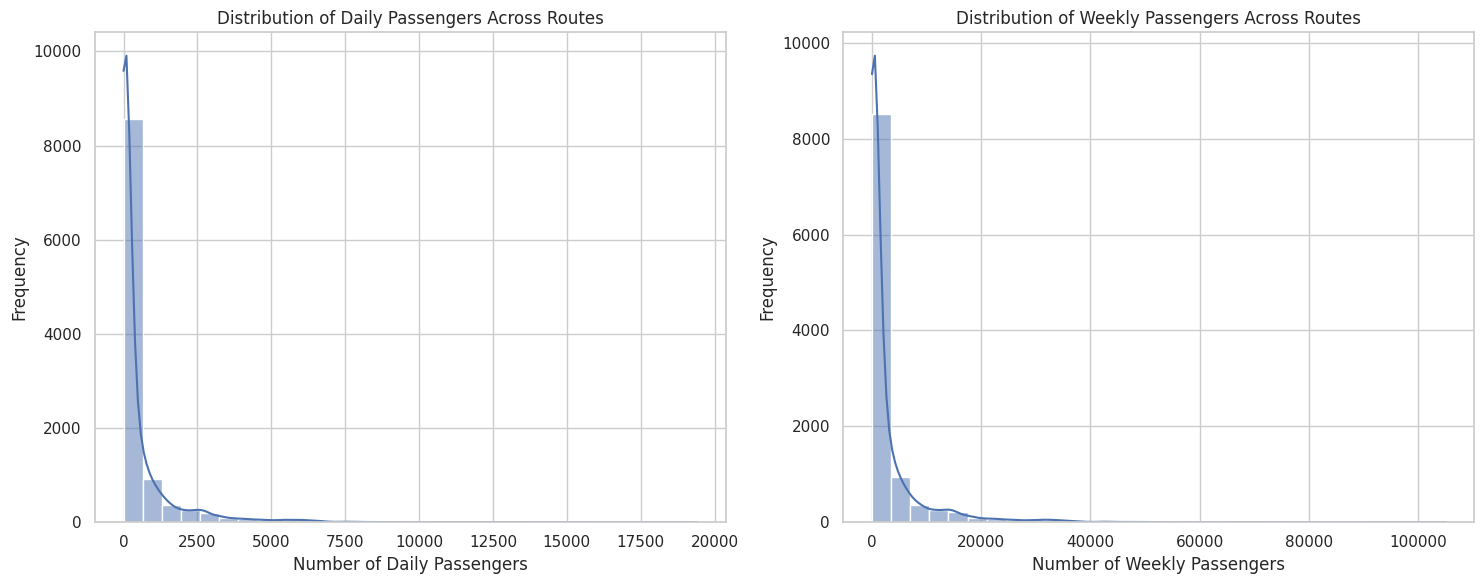

In [63]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Distribution of Daily Passengers Across Routes
sns.histplot(PublicTransitRoutesData['DailyPassengers'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Daily Passengers Across Routes')
axes[0].set_xlabel('Number of Daily Passengers')
axes[0].set_ylabel('Frequency')

# Distribution of Weekly Passengers Across Routes
sns.histplot(PublicTransitRoutesData['WeeklyPassengers'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Weekly Passengers Across Routes')
axes[1].set_xlabel('Number of Weekly Passengers')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


**Observation:**

- **Daily Passenger Distribution**: The plot shows that most bus routes carry fewer than 2,500 daily passengers, with a steep decline in frequency as the number of passengers increases. A small number of routes accommodate more than 5,000 daily passengers, but these are outliers. The majority of routes see low daily ridership, indicating that only a few routes handle a large proportion of passengers.

- **Weekly Passenger Distribution**: The weekly distribution is similar to the daily one but scaled up. Most routes handle fewer than 20,000 weekly passengers, with the bulk of routes managing fewer than 10,000. Again, the distribution has a heavy tail, with a few outliers serving significantly more passengers per week.

**Answer:**
Both daily and weekly distributions are heavily right-skewed, indicating that most bus routes serve a relatively low number of passengers, while a few routes account for much higher passenger volumes. This implies a high concentration of passenger demand on a few key routes, with the majority of routes seeing lower ridership.

### **Which bus routes have the highest and lowest number of passengers?**

In [64]:
#Lowest Number of Passengers By Routes :
#Weekly passengers:
print("Lowest Number of Passengers By Routes :")
print("Weekly passengers:")
print(PublicTransitRoutesData.groupby('RouteID')['WeeklyPassengers'].sum().sort_values(ascending=True).head(3))
print()

#Daily passengers:
print("Daily passengers:")
print(PublicTransitRoutesData.groupby('RouteID')['DailyPassengers'].sum().sort_values(ascending=True).head(3))
print()
#Highest Number of Passengers By Routes :
#Weekly Passengers:
print(f"Highest Weekly Passengers That Routes have :\n{PublicTransitRoutesData.groupby('RouteID')['WeeklyPassengers'].sum().sort_values(ascending=False).head(3)}")
print()

#Daily Passengers :
print(f"Highest Daily Passengers That Route have :\n{PublicTransitRoutesData.groupby('RouteID')['DailyPassengers'].sum().sort_values(ascending=False).head(3)}")
print()

Lowest Number of Passengers By Routes :
Weekly passengers:
RouteID
27097    0.0
12802    0.0
11803    0.0
Name: WeeklyPassengers, dtype: float64

Daily passengers:
RouteID
11803    0.0
12249    0.0
46050    0.0
Name: DailyPassengers, dtype: float64

Highest Weekly Passengers That Routes have :
RouteID
83001    279890.9
17055    206014.1
32006    192054.8
Name: WeeklyPassengers, dtype: float64

Highest Daily Passengers That Route have :
RouteID
83001    46944.7
17055    37762.2
32006    34964.1
Name: DailyPassengers, dtype: float64



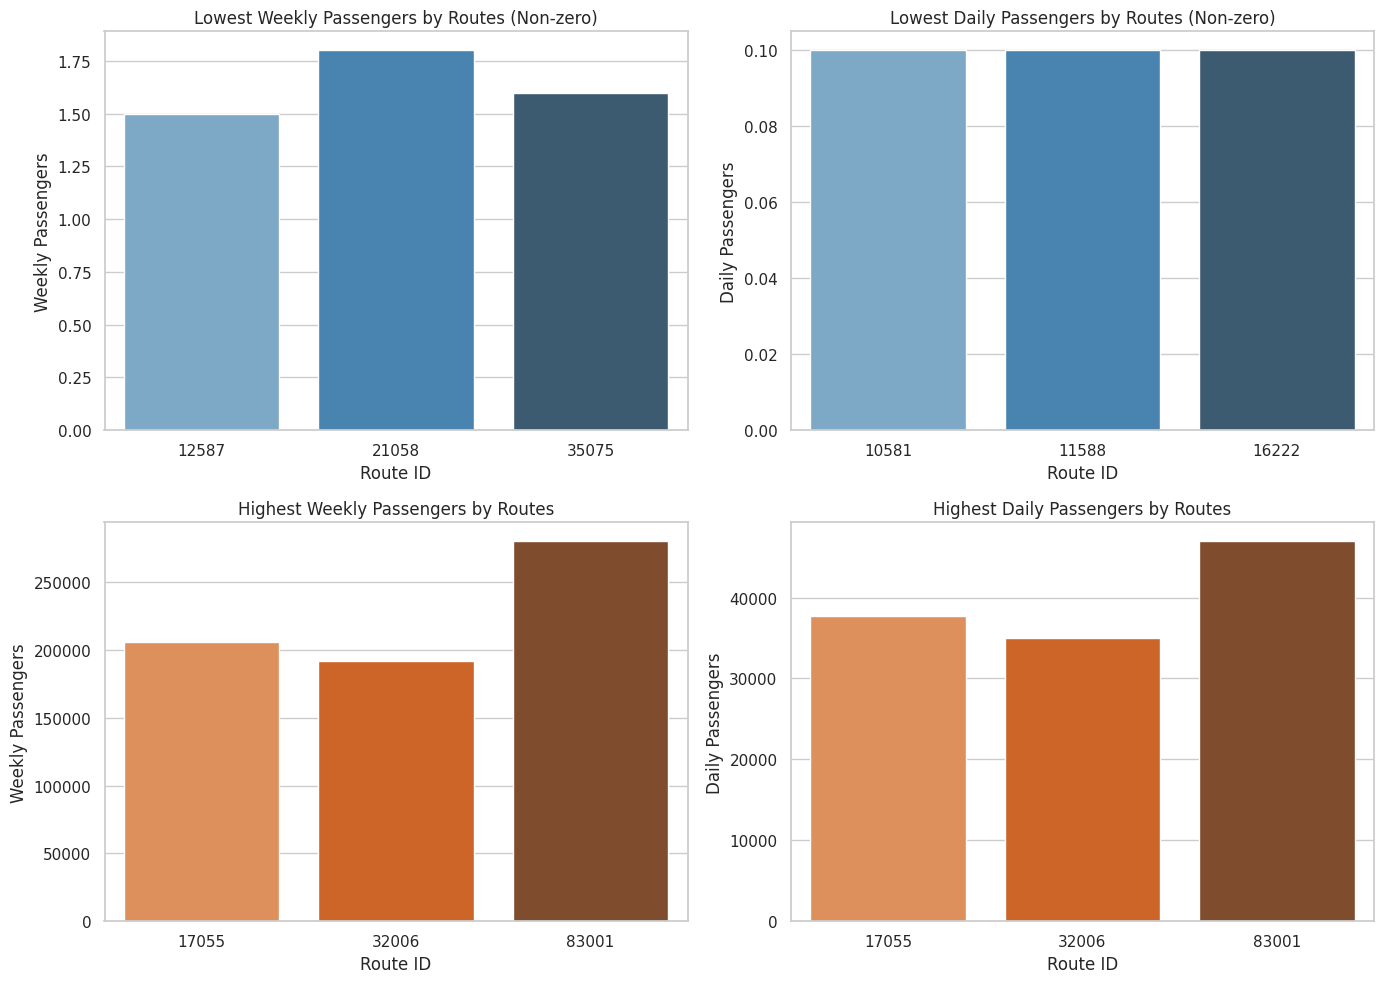

In [65]:
# Filter out routes with zero passengers
lowest_weekly_non_zero = PublicTransitRoutesData.groupby('RouteID')['WeeklyPassengers'].sum().sort_values(ascending=True).replace(0, None).dropna().head(3)
lowest_daily_non_zero = PublicTransitRoutesData.groupby('RouteID')['DailyPassengers'].sum().sort_values(ascending=True).replace(0, None).dropna().head(3)

# Calculate highest weekly and daily passengers
highest_weekly = PublicTransitRoutesData.groupby('RouteID')['WeeklyPassengers'].sum().sort_values(ascending=False).head(3)
highest_daily = PublicTransitRoutesData.groupby('RouteID')['DailyPassengers'].sum().sort_values(ascending=False).head(3)

# Plotting the updated data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Lowest Weekly Passengers (non-zero)
sns.barplot(x=lowest_weekly_non_zero.index, y=lowest_weekly_non_zero.values, ax=axes[0, 0], palette='Blues_d')
axes[0, 0].set_title('Lowest Weekly Passengers by Routes (Non-zero)')
axes[0, 0].set_xlabel('Route ID')
axes[0, 0].set_ylabel('Weekly Passengers')

# Lowest Daily Passengers (non-zero)
sns.barplot(x=lowest_daily_non_zero.index, y=lowest_daily_non_zero.values, ax=axes[0, 1], palette='Blues_d')
axes[0, 1].set_title('Lowest Daily Passengers by Routes (Non-zero)')
axes[0, 1].set_xlabel('Route ID')
axes[0, 1].set_ylabel('Daily Passengers')

# Highest Weekly Passengers
sns.barplot(x=highest_weekly.index, y=highest_weekly.values, ax=axes[1, 0], palette='Oranges_d')
axes[1, 0].set_title('Highest Weekly Passengers by Routes')
axes[1, 0].set_xlabel('Route ID')
axes[1, 0].set_ylabel('Weekly Passengers')

# Highest Daily Passengers
sns.barplot(x=highest_daily.index, y=highest_daily.values, ax=axes[1, 1], palette='Oranges_d')
axes[1, 1].set_title('Highest Daily Passengers by Routes')
axes[1, 1].set_xlabel('Route ID')
axes[1, 1].set_ylabel('Daily Passengers')

plt.tight_layout()
plt.show()


**Highest Number of Passengers (Weekly & Daily):**
- **Weekly:** The routes with the highest weekly passengers are:
  - **Route 83001**: 279,890 passengers
  - **Route 17055**: 206,014 passengers
  - **Route 32006**: 192,054 passengers
- **Daily:** Similarly, the highest daily passenger counts are observed on the same routes:
  - **Route 83001**: 46,944 passengers
  - **Route 17055**: 37,762 passengers
  - **Route 32006**: 34,964 passengers
- **Observation:** These routes handle significantly larger volumes of passengers and represent key routes in the network.


**Lowest Number of Passengers (Weekly & Daily):**

- **Weekly:** After excluding routes with zero passengers, the routes with the lowest weekly passengers are:
  - **Route 12587**: 1.59 passengers
  - **Route 21058**: 1.76 passengers
  - **Route 35075**: 1.51 passengers
- **Daily:** After excluding zero-passenger routes, the lowest daily passengers are:
  - **Route 10581**: 0.10 passengers
  - **Route 11588**: 0.10 passengers
  - **Route 16222**: 0.10 passengers
- **Observation:** These routes have extremely low passenger counts, indicating underutilized or inefficiently scheduled services.

In summary, **Route 83001** stands out as the busiest, whereas routes like **10581** and **12587** serve the fewest passengers. This data can help in optimizing service allocation, potentially reducing or reconfiguring low-demand routes and ensuring efficient resources for high-demand ones.

### **What are the most common route types, service types and bus sizes?**

In [66]:
# Most common RouteType
most_common_route_type = PublicTransitRoutesData['RouteType'].value_counts().idxmax()
route_type_counts = PublicTransitRoutesData['RouteType'].value_counts()

# Most common ServiceType
most_common_service_type = PublicTransitRoutesData['ServiceType'].value_counts().idxmax()
service_type_counts = PublicTransitRoutesData['ServiceType'].value_counts()

# Most common BusSize
most_common_bus_size =PublicTransitRoutesData['BusSize'].value_counts().idxmax()
bus_size_counts = PublicTransitRoutesData['BusSize'].value_counts()

print("Most common Route Type:", most_common_route_type)
print("Route Type counts:\n", route_type_counts)

print("\nMost common Service Type:", most_common_service_type)
print("Service Type counts:\n", service_type_counts)

print("\nMost common Bus Size:", most_common_bus_size)
print("Bus Size counts:\n", bus_size_counts)


Most common Route Type: עירוני
Route Type counts:
 RouteType
עירוני       5064
בינעירוני    4342
אזורי        1272
Name: count, dtype: int64

Most common Service Type: מקומי מאסף
Service Type counts:
 ServiceType
מקומי מאסף           4978
מאסף                 4234
מהיר                  850
ישיר                  530
עירוני עורקי מאסף      68
עירוני עורקי מהיר      18
Name: count, dtype: int64

Most common Bus Size: אוטובוס
Bus Size counts:
 BusSize
אוטובוס     8838
מיניבוס     1356
מפרקי        241
מידיבוס      208
לא מוגדר      35
Name: count, dtype: int64


#### **Route Type Distrubution**

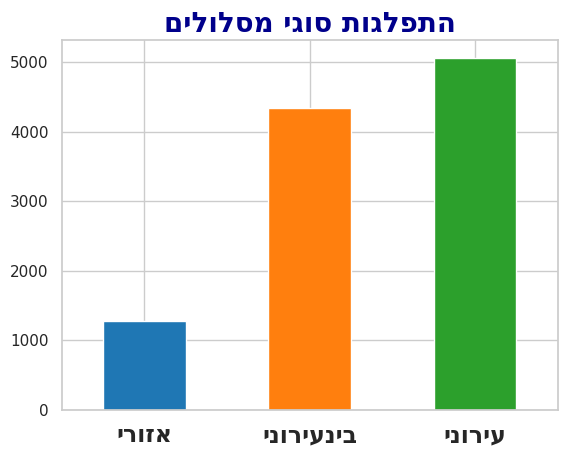

In [67]:

# Apply the Bidi algorithm to reverse the Hebrew text correctly
correct_labels = [get_display(label) for label in route_type_counts.index]

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Example colors (blue, orange, green)

# Plot the bar chart
ax = route_type_counts.sort_values(ascending=True).plot.bar(color=colors)

# Correct the rotation and alignment for Hebrew with Bidi
ax.set_xticklabels(correct_labels[::-1], rotation=0, fontweight='bold', fontsize=17)  # Apply correct labels with color

# Set title and labels with specified font properties
plt.title(get_display('התפלגות סוגי מסלולים'), fontsize=20, fontweight='bold', color='darkblue')  # Title color
plt.xlabel('')  # Optional: Remove x-axis label if not needed

# Show the plot
plt.show()

Observations for Route Type Distribution:

1. **Most Common Route Type:**
   - The most frequent route type is **"עירוני" (Urban)**, making up the largest proportion with more than 5,000 routes. This suggests a heavy focus on urban transportation services.
   
2. **Other Route Types:**
   - **"בינעירוני" (Intercity)** routes are the second most common, with more than 4,000 routes, showing significant demand for longer-distance, city-to-city transport.
   - **"אזורי" (Regional)** routes are the least common, with about 1,200 routes, indicating fewer services in regional areas compared to urban and intercity routes.

This distribution highlights the dominance of urban routes, which may reflect the population density and transport needs in urban areas, while intercity and regional routes cater to commuters and smaller regions.

#### **Service Type Distrubution**

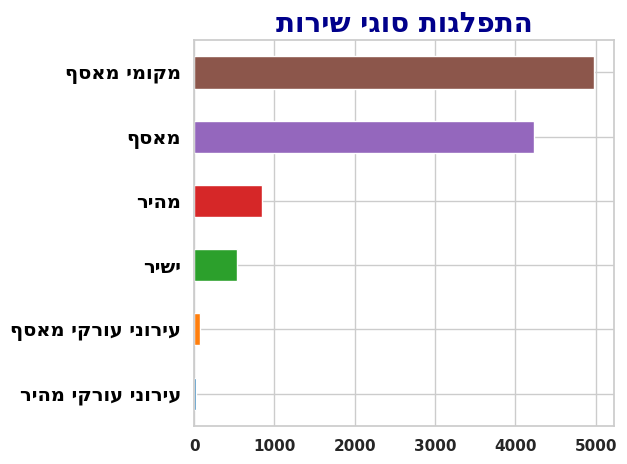

In [68]:
# Apply the Bidi algorithm to reverse the Hebrew text correctly
correct_labels = [get_display(label) for label in service_type_counts.index]
colors = ['#1f77b4',  # Blue
          '#ff7f0e',  # Orange
          '#2ca02c',  # Green
          '#d62728',  # Red
          '#9467bd',  # Purple
          '#8c564b',  # Brown
          '#e377c2',  # Pink
          '#7f7f7f',  # Gray
          '#bcbd22',  # Olive
          '#17becf']  # Teal

# Plot the horizontal bar chart
ax = service_type_counts.sort_values(ascending=True).plot.barh(color=colors)  # Horizontal bar chart

# Correct the y-tick labels (reverse order for Hebrew RTL)
ax.set_yticklabels(correct_labels[::-1], fontweight='bold', fontsize=14, color='black')

# Align the title to the right, and apply bidi for Hebrew text
plt.title(get_display('התפלגות סוגי שירות'), fontsize=20, fontweight='bold', color='darkblue')

plt.ylabel('')
plt.xticks(fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Observations for Service Type Distribution:

1. **Most Common Service Type:**
   - The **"מקומי מאסף" (Local Collecting)** service type is the most frequent, representing nearly 5,000 instances. This suggests that most routes prioritize making multiple stops to pick up passengers, likely for short to medium distance journeys within local areas.

2. **Other Prominent Service Types:**
   - **"מאסף" (Collecting)** services also form a large proportion, with over 4,000 occurrences, indicating the popularity of services that stop frequently to pick up passengers along the route.
   - **"מהיר" (Express)** and **"ישיר" (Direct)** services are less common, indicating that fewer routes focus on non-stop or limited-stop journeys.

3. **Specialized Services:**
   - The service types **"עירוני עורקי מאסף" (Urban Arterial Collecting)** and **"עירוני עורקי מהיר" (Urban Arterial Express)** are rare, suggesting they serve niche or specialized routes.

The chart reflects a strong emphasis on services that make frequent stops, catering to localized or commuting needs, while express and direct services are used more sparingly.

#### **Bus Size Distribution**

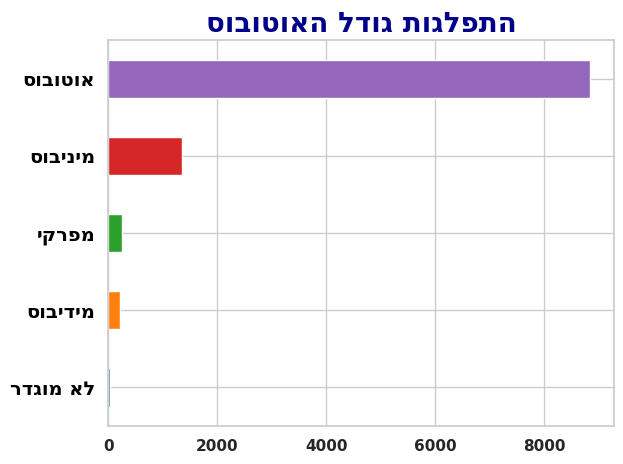

In [69]:
# Apply the Bidi algorithm to reverse the Hebrew text correctly
correct_labels = [get_display(label) for label in bus_size_counts.index]
# Plot the horizontal bar chart
ax = bus_size_counts.sort_values(ascending=True).plot.barh(color=colors)  # Horizontal bar chart

# Correct the y-tick labels (reverse order for Hebrew RTL)
ax.set_yticklabels(correct_labels[::-1], fontweight='bold', fontsize=14, color='black')

# Align the title to the right, and apply bidi for Hebrew text
plt.title(get_display('התפלגות גודל האוטובוס'), fontsize=20, fontweight='bold', color='darkblue')

plt.ylabel('')
plt.xticks(fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Observations for Bus Size Distribution:

1. **Most Common Bus Size:**
   - The **"אוטובוס" (Standard Bus)** is overwhelmingly the most common bus size, with nearly 9,000 instances. This suggests that the standard full-sized bus is the primary mode of public transport across most routes, likely due to its capacity and suitability for a wide range of passenger volumes.

2. **Other Bus Sizes:**
   - **"מיניבוס" (Minibus)** is the next most common, although it is far less frequent compared to standard buses. This could indicate the use of minibuses for routes with lower passenger demand or for specialized services.
   - **"מפרקי" (Articulated Bus)** and **"מידיבוס" (Midibus)** are rarely used, suggesting they are reserved for specific cases or routes with unique needs.

3. **Unspecified Sizes:**
   - A small category of **"לא מוגדר" (Not Specified)** buses indicates that a few records do not have a defined bus size, but this is negligible compared to the overall data.

The dominance of standard buses highlights their importance in the public transportation network, while smaller or specialized buses play a more limited role.

## **Time-Based Analysis**

### **How does passenger count vary across different time slots?**

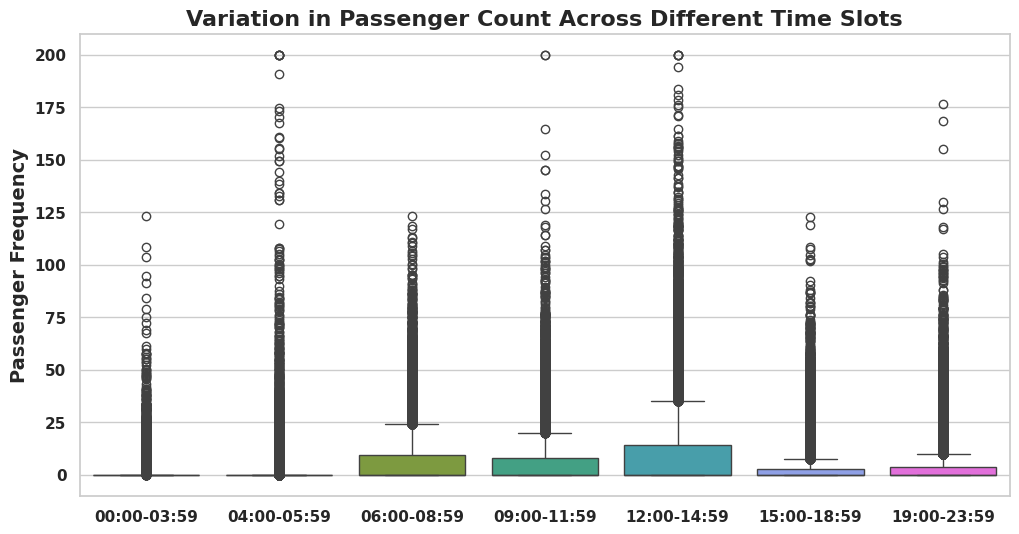

In [70]:
plt.figure(figsize=(12, 6))

# Define a color palette
color_palette = sns.color_palette("husl", len(BusPassengerTimeSlots['TimeSlot'].unique()))

# Create the boxplot with the specified color palette
sns.boxplot(x='TimeSlot', y='Passengers', data=BusPassengerTimeSlots, palette=color_palette)

# Set titles and labels with bold font
plt.title('Variation in Passenger Count Across Different Time Slots', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Passenger Frequency', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')

# Show the plot
plt.show()

**Time-Based Analysis Observation:**

- **Peak Hours:**
  - The highest passenger counts occur during **06:00-08:59** and **12:00-14:59**, with more outliers and higher median values. These time slots likely represent peak commuting times, such as mornings when people go to work or school and around lunchtime.

- **Off-Peak Hours:**
  - Time slots like **00:00-03:59** and **19:00-23:59** show significantly lower passenger frequency, indicating these are less busy times. The box plots for these hours are condensed, with fewer outliers and lower median values.

- **Variation in Passengers:**
  - The box plot reveals substantial variation during peak hours, as indicated by the presence of many outliers. This suggests that some routes or time slots experience exceptionally high passenger volumes compared to others.

- **Evening vs. Morning:**
  - Evening hours have fewer outliers and lower variability compared to morning hours, likely because fewer people use public transport later in the day.

Overall, this time-based analysis shows clear peak times with increased passenger activity during mornings and midday, which is useful for optimizing bus schedules and improving service during those periods.

### **How does passenger count vary across different Category Workdays?**

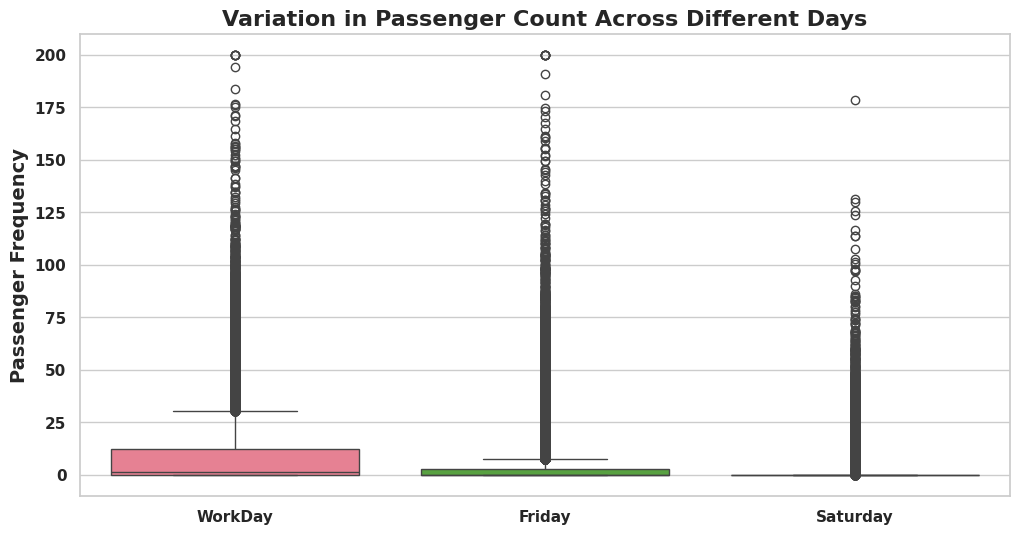

In [71]:
plt.figure(figsize=(12, 6))

# Define a color palette
color_palette = sns.color_palette("husl", len(BusPassengerTimeSlots['Category'].unique()))

# Create the boxplot with the specified color palette
sns.boxplot(x='Category', y='Passengers', data=BusPassengerTimeSlots, palette=color_palette)

# Set titles and labels with bold font
plt.title('Variation in Passenger Count Across Different Days', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Passenger Frequency', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')

# Show the plot
plt.show()

**Day-Based Analysis Observation:**

- **Workdays (Weekdays):**
  - The passenger count on workdays shows significantly higher variability, with a larger number of outliers indicating higher demand for public transportation. The median passenger count is also higher compared to Fridays and Saturdays, suggesting that workdays are the busiest days for bus routes.

- **Friday:**
  - Fridays have a much lower median passenger count and fewer outliers. This likely reflects a lighter schedule, as Fridays might be considered either partial workdays or the start of the weekend, depending on the region.

- **Saturday:**
  - Saturdays display lower overall passenger counts and fewer outliers. This indicates reduced transportation demand, likely due to it being a weekend day, with fewer people commuting.

Overall, workdays have the highest and most varied passenger traffic, while Fridays and Saturdays show significantly lower demand. This suggests that transport planners should allocate more resources on weekdays to handle higher passenger volumes.

### **Which time slots see the highest number of passengers?**

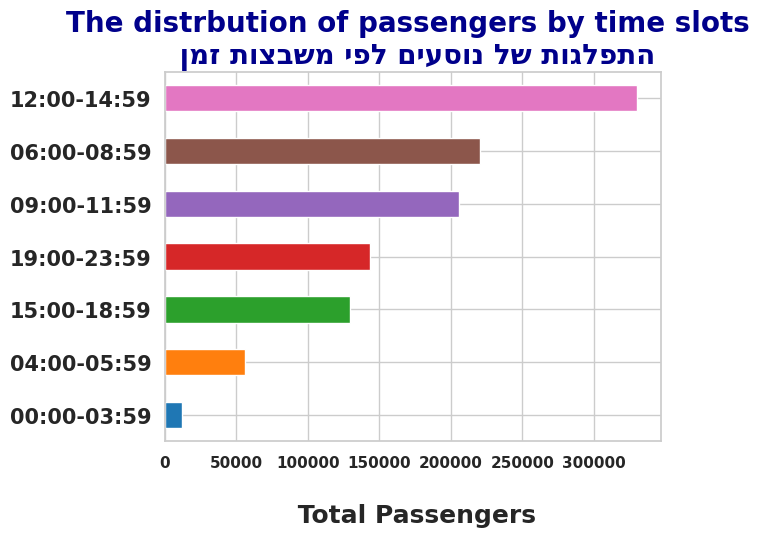

In [72]:
colors = ['#1f77b4',  # Blue
          '#ff7f0e',  # Orange
          '#2ca02c',  # Green
          '#d62728',  # Red
          '#9467bd',  # Purple
          '#8c564b',  # Brown
          '#e377c2',  # Pink
          '#7f7f7f',  # Gray
          '#bcbd22',  # Olive
          '#17becf']  # Teal
label = 'התפלגות של נוסעים לפי משבצות זמן'
# Grouping by time slot and summing passenger counts
passenger_count_by_slot = BusPassengerTimeSlots.groupby('TimeSlot')['Passengers'].sum().sort_values(ascending=True)

# Display the top time slots

passenger_count_by_slot.plot.barh(color = colors)
plt.ylabel('')
plt.xlabel('\n Total Passengers',fontweight='bold',fontsize=18)
plt.xticks(rotation= 0,fontweight='bold')
plt.yticks(fontweight='bold',fontsize=15)
plt.title(f'The distrbution of passengers by time slots \n {get_display(label)}',fontsize=20, fontweight='bold', color='darkblue')
plt.show()

**Time-Based Analysis Observation:**

- The busiest time slot for passengers is **12:00-14:59**, which indicates peak midday travel, possibly aligning with lunch breaks, school pickups, or mid-shift transport needs.
  
- The second most significant time slot is **06:00-08:59**, which corresponds to the early morning rush hour, when commuters are traveling to work or school.

- **09:00-11:59** also shows a high passenger count, potentially covering mid-morning transportation needs.

- Evening time slots, such as **19:00-23:59** and **15:00-18:59**, also witness moderate passenger counts, possibly due to people returning from work, shopping, or evening activities.

- The least busy time slots are during the late night and early morning hours, particularly **00:00-03:59**, indicating low demand during these periods.

This analysis shows that most passengers travel during standard working hours and midday, with reduced demand during early morning and late-night hours.

### **Which Day Categories see the highest number of passengers?**

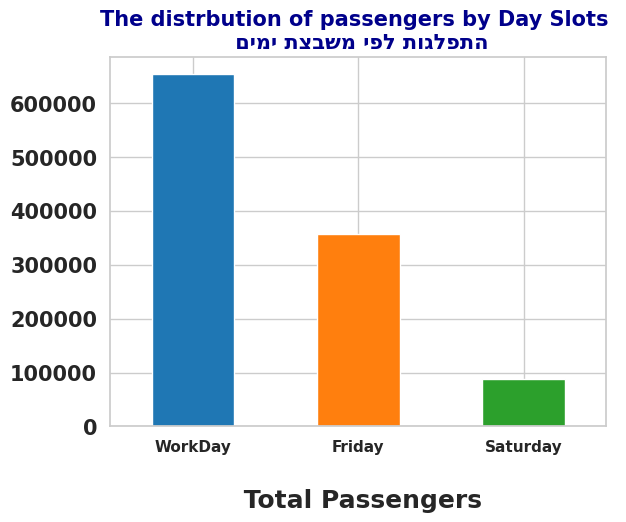

In [73]:
# Grouping by day and summing passenger counts
passenger_count_by_day = BusPassengerTimeSlots.groupby('Category')['Passengers'].sum().sort_values(ascending=False)

# Display the top time slots
label = 'התפלגות לפי משבצת ימים'
passenger_count_by_day.plot.bar(color = colors)
plt.ylabel('')
plt.xlabel('\n Total Passengers',fontweight='bold',fontsize=18)
plt.xticks(rotation= 0,fontweight='bold')
plt.yticks(fontweight='bold',fontsize=15)
plt.title(f'The distrbution of passengers by Day Slots \n {get_display(label)}',fontsize=15, fontweight='bold', color='darkblue')
plt.show()

**Day-Based Analysis Observation:**

- **Workdays** see the highest number of passengers by a significant margin, with over 600,000 passengers. This is expected as most commuting happens during the workweek when people travel to work, school, and other daily activities.

- **Fridays** show a considerable drop in passenger numbers, with around half the count compared to workdays. This could be due to shorter work hours, religious observances, or fewer activities requiring transportation.

- **Saturdays** see the lowest number of passengers, likely due to religious or cultural practices where transportation services may be reduced, and fewer people travel.

This analysis clearly shows that workdays dominate passenger demand, while Fridays and Saturdays have noticeably lower transportation activity.

### **Which Category Day and hour has the highest number of passengers?**

MaxRidership
ימי חול - 12:00-14:59    4681
ימי חול - 06:00-08:59    2205
שישי - 12:00-14:59       1088
ימי חול - 15:00-18:59     475
שבת - 19:00-23:59         444
ימי חול - 09:00-11:59     381
שישי - 09:00-11:59        323
שישי - 06:00-08:59        255
ימי חול - 19:00-23:59     204
ימי חול - 00:00-03:59     178
ימי חול - 04:00-05:59      96
שישי - 04:00-05:59         95
שבת - 12:00-14:59          92
שבת - 15:00-18:59          50
שישי - 15:00-18:59         34
שבת - 06:00-08:59          29
שישי - 19:00-23:59         21
שישי - 00:00-03:59         13
שבת - 00:00-03:59           7
שבת - 09:00-11:59           7
Name: count, dtype: int64


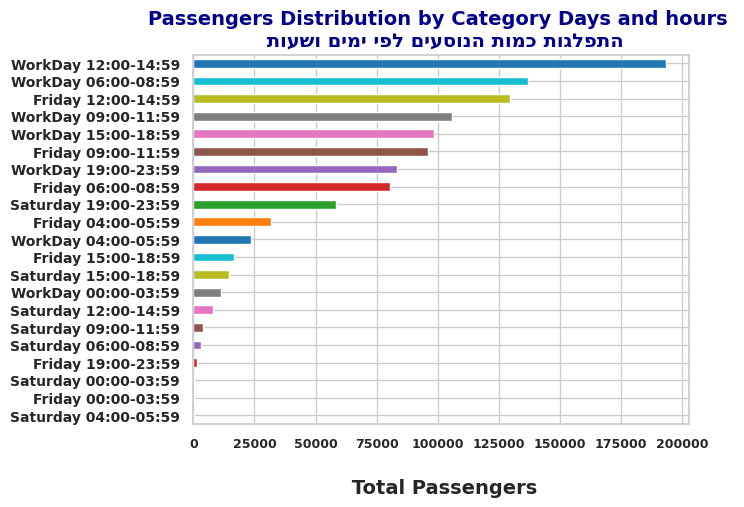

In [74]:
label = 'התפלגות כמות הנוסעים לפי ימים ושעות'
# Grouping by time slot and summing passenger counts
passenger_count_by_Dayhour = BusPassengerTimeSlots.groupby('DayHour')['Passengers'].sum().sort_values(ascending=True)
passenger_count_by_Dayhour
# Display the top time slots
passenger_count_by_Dayhour1 = PublicTransitRoutesData['MaxRidership'].value_counts().sort_values(ascending=False)
# print(passenger_count_by_Dayhour)
print(passenger_count_by_Dayhour1)
passenger_count_by_Dayhour.plot.barh(color = colors)
plt.ylabel('')
plt.xlabel('\n Total Passengers',fontweight='bold',fontsize=14)
plt.xticks(rotation= 0,fontweight='bold',fontsize=9)
plt.yticks(fontweight='bold',fontsize=10)
plt.title(f'Passengers Distribution by Category Days and hours \n {get_display(label)}',fontsize=14, fontweight='bold', color='darkblue')
plt.show()

**Observation for Day and Hour Category Analysis:**

- **Workdays between 12:00-14:59** see the highest number of passengers across all day-hour categories, likely due to peak midday travel during lunch breaks or errands.
  
- **Workdays between 06:00-08:59** follow closely behind, which is expected as this time slot corresponds with the morning rush hour when most people are commuting to work or school.

- **Fridays between 12:00-14:59** also have a significant number of passengers, indicating midday travel is still active on Fridays, though the volume is reduced compared to workdays.

- **Saturday late evening (19:00-23:59)** shows notable activity, possibly reflecting people traveling for leisure or social activities during the weekend.

- **The lowest passenger counts** are seen in the early morning hours (00:00-03:59) and Saturday mornings, which are expected to have less activity.

This analysis indicates that **midday and early morning** time slots on workdays have the most consistent passenger demand, while weekends, particularly Saturdays, see much lower transportation usage.

### **Is there any correlation between time slots and passengers?**

**Checking The Correlation with scipy libary:**

*   H0 (Null Hypothesis): The variables TimeSlots and BusSize are independent.
*   H1 (Alternative Hypothesis): The variables TimeSlots and BusSize are dependent.

In [75]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
CorrColumns = {1 : ['TimeSlot' , 'Passengers'] ,2 : ['Category','Passengers'], 3:['DayHour' , 'Passengers']}
results = []
p_values = []
for ind in CorrColumns.keys():
  print()
  print(f'Correlation Between {CorrColumns[ind][0]} and {CorrColumns[ind][1]}')
  print()
  results.append(pg.welch_anova(dv=CorrColumns[ind][1], between=CorrColumns[ind][0], data=BusPassengerTimeSlots))
  print(results[ind-1])

  # interpret p-value
  alpha = 0.05
  #adding p values to the list:
  p_values.append(results[ind-1]['p-unc'].loc[0])
  print(f"p value is {p_values[ind-1]}")
  if p_values[ind-1] <= alpha:
    print(f'Dependent (reject H0) is statistically significant correlation between {CorrColumns[ind][0]} and {CorrColumns[ind][1]}')
  else:
    print(f'Independent (H0 holds true) is not statistically significant between {CorrColumns[ind][0]} and {CorrColumns[ind][1]}')



Correlation Between TimeSlot and Passengers

     Source  ddof1         ddof2            F  p-unc       np2
0  TimeSlot      6  94395.048778  4477.265477    0.0  0.068418
p value is 0.0
Dependent (reject H0) is statistically significant correlation between TimeSlot and Passengers

Correlation Between Category and Passengers

     Source  ddof1          ddof2             F  p-unc       np2
0  Category      2  125350.553028  10121.985503    0.0  0.068055
p value is 0.0
Dependent (reject H0) is statistically significant correlation between Category and Passengers

Correlation Between DayHour and Passengers

    Source  ddof1         ddof2            F  p-unc      np2
0  DayHour     20  80947.672805  2475.428965    0.0  0.19329
p value is 0.0
Dependent (reject H0) is statistically significant correlation between DayHour and Passengers


**Correlation Between TimeSlot and Passengers**

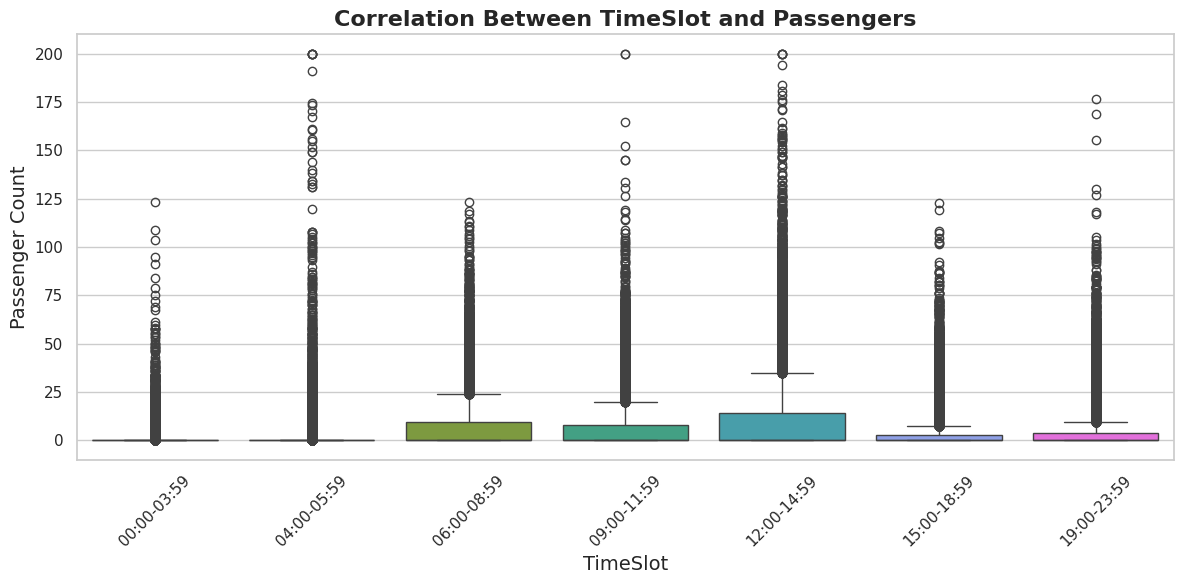

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for TimeSlot vs Passengers
plt.figure(figsize=(12, 6))
sns.boxplot(x='TimeSlot', y='Passengers', data=BusPassengerTimeSlots, palette='husl')

# Add labels and title
plt.title('Correlation Between TimeSlot and Passengers', fontsize=16, fontweight='bold')
plt.xlabel('TimeSlot', fontsize=14)
plt.ylabel('Passenger Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Correlation Between DayHour and Passengers**

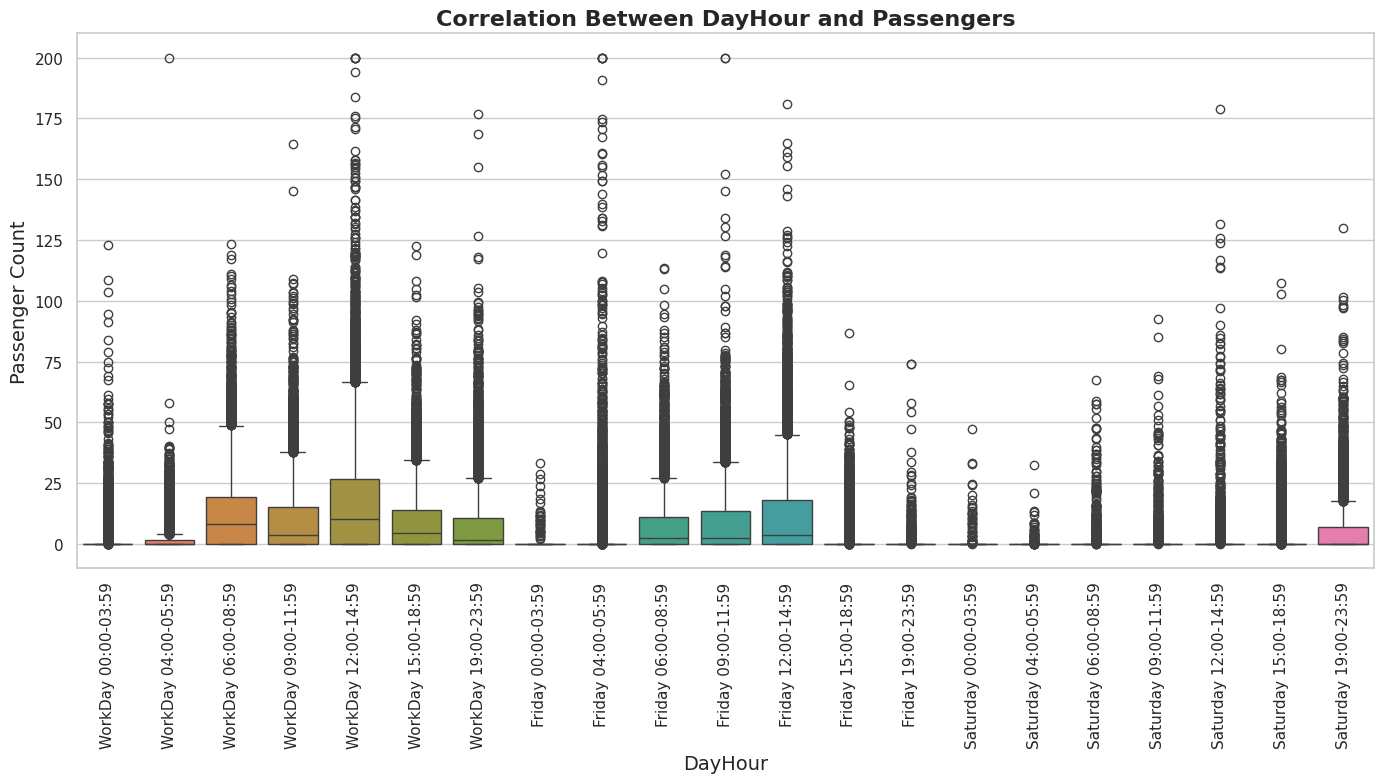

In [77]:
# Create a boxplot for DayHour vs Passengers
plt.figure(figsize=(14, 8))
sns.boxplot(x='DayHour', y='Passengers', data=BusPassengerTimeSlots, palette='husl')

# Add labels and title
plt.title('Correlation Between DayHour and Passengers', fontsize=16, fontweight='bold')
plt.xlabel('DayHour', fontsize=14)
plt.ylabel('Passenger Count', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Correlation Between Day Category and Passengers**

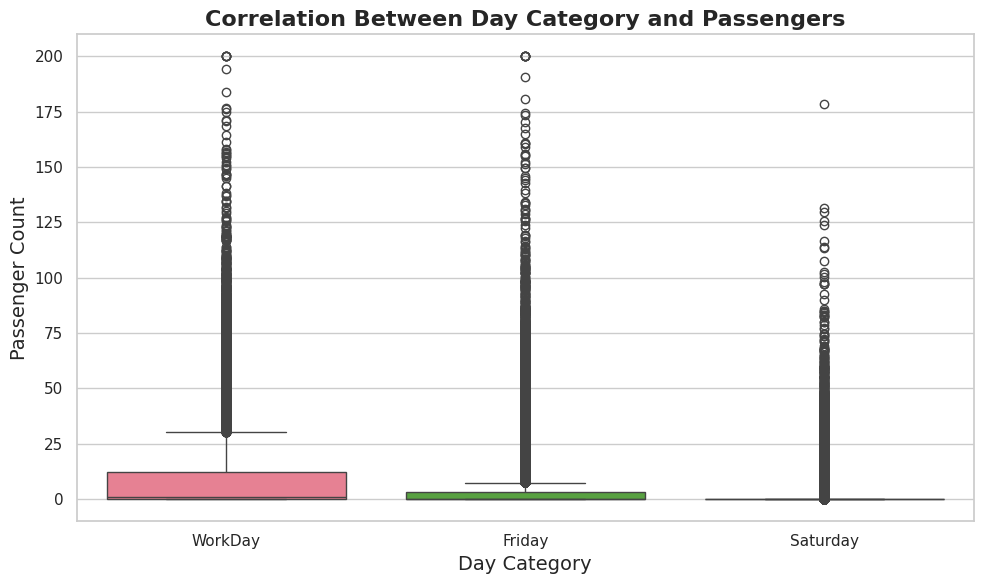

In [78]:
# Create a boxplot for Category vs Passengers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Passengers', data=BusPassengerTimeSlots, palette='husl')

# Add labels and title
plt.title('Correlation Between Day Category and Passengers', fontsize=16, fontweight='bold')
plt.xlabel('Day Category', fontsize=14)
plt.ylabel('Passenger Count', fontsize=14)
plt.tight_layout()
plt.show()


## **Location-Based Analysis**

### **Map Visualization**

**Bus Routes Visualization**

In [79]:
# Create a list of bus routes as tuples (origin to destination coordinates)
routes = [
    dict(
        type='scattergeo',
        lon=[row['OriginCityName_Longitude'], row['DestinationCityName_Longitude']],
        lat=[row['OriginCityName_Latitude'], row['DestinationCityName_Latitude']],
        mode='lines+markers',
        marker=dict(size=5, color='red'),  # Marker for cities
        line=dict(width=2, color='blue'),  # Line for bus route
        name=f"{row['OriginCityName']} → {row['DestinationCityName']}"
    )
    for _, row in GeoLocation.iterrows()
]

# Create a base map
fig = px.scatter_geo()

# Add the routes to the map
for route in routes:
    fig.add_trace(route)

# Customize the layout to center the map on Israel
fig.update_geos(
    projection_type="mercator",  # Use mercator projection for better zoom on Israel
    center={"lat": 31.5, "lon": 34.8},  # Center the map on Israel (approximate lat/lon)
    resolution=50,  # Increase map resolution
    fitbounds="locations",  # Fit the map to the routes
    visible=True,
    showland=True,  # Show land areas
    landcolor="lightgray",  # Optional: Customize land color
    oceancolor="lightblue",  # Optional: Customize ocean color
    showcountries=True,  # Display country borders
    showcoastlines=True,  # Display coastlines
    coastlinecolor="black"  # Optional: Customize coastline color
)

# Add a title to the map
fig.update_layout(
    title='Bus Routes Visualization in Israel',
    showlegend=False  # Hide legend for simplicity
)

# Show the map
fig.show()


In [80]:
# Load the GeoLocation DataFrame (ensure it's ready with district data)
# If GeoLocation isn't available from previous steps, load it from your file
# GeoLocation = pd.read_csv('GeoLocation.csv')

# Calculate average weekly passengers by origin and destination districts
origin_region_avg = GeoLocation.groupby('OriginDistrict')['WeeklyPassengers'].mean().reset_index()
dest_region_avg = GeoLocation.groupby('DestinationDistrict')['WeeklyPassengers'].mean().reset_index()

# Merge both origin and destination region data into a single DataFrame
regions_avg = pd.merge(
    origin_region_avg,
    dest_region_avg,
    left_on='OriginDistrict',
    right_on='DestinationDistrict',
    how='outer',
    suffixes=('_Origin', '_Destination')
)

# Fill any missing values with 0 (in case some regions only appear as origin or destination)
regions_avg.fillna(0, inplace=True)

# Calculate the combined average (origin + destination)
regions_avg['Average_WeeklyPassengers'] = (
    regions_avg['WeeklyPassengers_Origin'] + regions_avg['WeeklyPassengers_Destination']
) / 2

# Rename columns for clarity
regions_avg.rename(columns={'OriginDistrict': 'District'}, inplace=True)

# Plot the bar chart of average weekly passengers by region
fig = px.bar(
    regions_avg,
    x='District',
    y='Average_WeeklyPassengers',
    title='Average Weekly Passengers by Region',
    labels={'Average_WeeklyPassengers': 'Average Weekly Passengers'},
    color='Average_WeeklyPassengers',  # Color by value for visual impact
    color_continuous_scale='Blues'  # Choose a color scale
)

# Display the chart
fig.show()


In [81]:
# Load the GeoLocation DataFrame (ensure it's ready with district data)
# If GeoLocation isn't available from previous steps, load it from your file
# GeoLocation = pd.read_csv('GeoLocation.csv')

# Calculate average weekly passengers by origin and destination districts
origin_region_avg = GeoLocation.groupby('OriginDistrict')['DailyPassengers'].mean().reset_index()
dest_region_avg = GeoLocation.groupby('DestinationDistrict')['DailyPassengers'].mean().reset_index()

# Merge both origin and destination region data into a single DataFrame
regions_avg = pd.merge(
    origin_region_avg,
    dest_region_avg,
    left_on='OriginDistrict',
    right_on='DestinationDistrict',
    how='outer',
    suffixes=('_Origin', '_Destination')
)

# Fill any missing values with 0 (in case some regions only appear as origin or destination)
regions_avg.fillna(0, inplace=True)

# Calculate the combined average (origin + destination)
regions_avg['Average_DailyPassengers'] = (
    regions_avg['DailyPassengers_Origin'] + regions_avg['DailyPassengers_Destination']
) / 2

# Rename columns for clarity
regions_avg.rename(columns={'OriginDistrict': 'District'}, inplace=True)

# Plot the bar chart of average weekly passengers by region
fig = px.bar(
    regions_avg,
    x='District',
    y='Average_DailyPassengers',
    title='Average Daily Passengers by Region',
    labels={'Average_DailyPassengers': 'Average Weekly Passengers'},
    color='Average_DailyPassengers',  # Color by value for visual impact
    color_continuous_scale='Blues'  # Choose a color scale
)

# Display the chart
fig.show()


### **Which cities are the most common origins and destinations?**

In [82]:
# Count occurrences of origin cities
origin_city_counts = PublicTransitRoutesData['OriginCityName'].value_counts()

# Count occurrences of destination cities
destination_city_counts = PublicTransitRoutesData['DestinationCityName'].value_counts()

# Display the most common origin and destination cities
print("Most Common Origin Cities:")
print(origin_city_counts.head(10))

print("\nMost Common Destination Cities:")
print(destination_city_counts.head(10))

Most Common Origin Cities:
OriginCityName
ירושלים          1312
תל אביב יפו       578
חיפה              574
באר שבע           303
אשדוד             230
פתח תקווה         225
נתניה             220
מודיעין עילית     218
בני ברק           208
טבריה             184
Name: count, dtype: int64

Most Common Destination Cities:
DestinationCityName
ירושלים          1314
תל אביב יפו       597
חיפה              583
באר שבע           300
מודיעין עילית     228
אשדוד             226
פתח תקווה         219
נתניה             218
בני ברק           201
טבריה             176
Name: count, dtype: int64


**Origin Cities Distribution :**

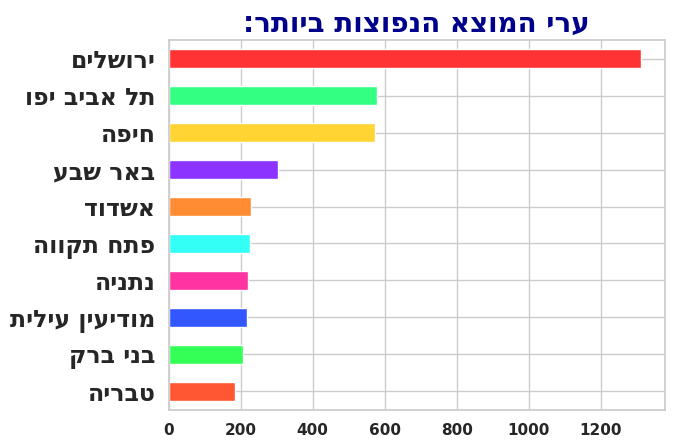

In [83]:
# Define colors
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#33FFF6',
          '#FF8C33', '#8C33FF', '#FFD433', '#33FF83', '#FF3333']

# Apply the Bidi algorithm to reverse the Hebrew text correctly
correct_labels = [get_display(label) for label in origin_city_counts.head(10).index]

# Plot the horizontal bar chart
ax = origin_city_counts.head(10).sort_values(ascending=True).plot.barh(color=colors)
ax.set_yticklabels(correct_labels[::-1], fontweight='bold', fontsize=17)  # Reverse the label order for correct display

# Set title with Bidi and labels
plt.title(get_display('ערי המוצא הנפוצות ביותר:'), fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontweight='bold')

# Show the plot
plt.show()


**Observation for Most Common Origin Cities:**

- **Jerusalem** stands out significantly as the most common origin city with over 1,300 routes originating from there. This highlights Jerusalem's role as a central transportation hub, reflecting its population size and status as a major metropolitan center.
  
- **Tel Aviv-Yafo** and **Haifa** rank second and third respectively, with around 570-580 routes each. These cities are key urban centers in Israel, with large commuting populations and high connectivity, contributing to their frequent appearance as origin points.

- **Be’er Sheva** and **Ashdod** are important regional centers, each contributing a substantial number of routes. They indicate strong transportation networks in the southern and coastal regions of Israel.

- **Petah Tikva** and **Netanya** also show considerable activity as origin cities, which aligns with their roles as major suburban areas with large residential populations that likely commute to other cities for work or school.

- **Modi’in Illit**, **Bnei Brak**, and **Tiberias** appear in the top 10, reflecting the importance of these smaller cities in the overall transportation network. Despite being less central than cities like Jerusalem or Tel Aviv, they have considerable commuter traffic.

- **Tiberias**, while being a smaller and more peripheral city, still makes the top 10, possibly due to its tourism and regional importance, especially in connection with northern Israel.

This analysis shows that **Jerusalem, Tel Aviv-Yafo, and Haifa** are the primary origin cities for bus routes, with a balanced mix of both major metropolitan centers and key regional cities contributing significantly to the public transportation network.

**Destination Cities Distribution**

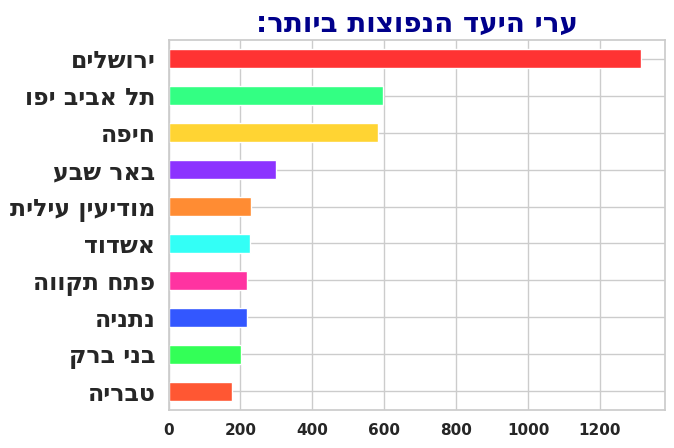

In [84]:
# Apply the Bidi algorithm to reverse the Hebrew text correctly
correct_labels = [get_display(label) for label in destination_city_counts.head(10).index]

# Plot the horizontal bar chart
ax = destination_city_counts.head(10).sort_values(ascending=True).plot.barh(color=colors)

# Correct the y-tick labels for Hebrew
ax.set_yticklabels(correct_labels[::-1], fontweight='bold', fontsize=17)
# Set title with Bidi and labels
plt.title(get_display('ערי היעד הנפוצות ביותר:'), fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontweight='bold')

# Show the plot
plt.show()

**Observation for Most Common Destination Cities:**

- **Jerusalem** also leads as the most common destination city with over 1,300 routes terminating there, which is consistent with its role as a major destination for both commuters and travelers.

- **Tel Aviv-Yafo** and **Haifa** are the next most frequent destination cities, similar to their ranking in the origin cities. This reflects the fact that these cities serve as both major origins and destinations within Israel's public transportation system, supporting large volumes of commuting traffic.

- **Be’er Sheva** and **Modi’in Illit** appear frequently as destination cities, indicating significant regional traffic heading to these areas.

- **Ashdod**, **Petah Tikva**, and **Netanya** are also common destinations, which aligns with the fact that these suburban cities have large populations that commute to other areas but also serve as end points for various routes.

- **Bnei Brak** and **Tiberias** round out the top 10, showcasing their importance as key destination cities, whether due to religious or regional significance.

This analysis reveals that **Jerusalem, Tel Aviv-Yafo, and Haifa** are central to the bus network as both major origins and destinations. However, there is also substantial traffic heading toward **Modi’in Illit**, **Bnei Brak**, and other smaller cities, reflecting the spread of transportation demand across different regions.

### **What is the relationship between origin and destination city on route popularity?**

**Checking Correleation:**

In [85]:
# defining the table
contingency1 = pd.crosstab(PublicTransitRoutesData['OriginCityName'], PublicTransitRoutesData['DestinationCityName'])

# performing the chi-square test
stat, p, dof, expected = chi2_contingency(contingency1)

# interpret p-value
alpha = 0.05
print(f"p value is {p}")
if p <= alpha:
    print('Dependent (reject H0) is statistically significant correlation between Origin  and Destination Cities')
else:
    print('Independent (H0 holds true) is not statistically significant between Origin  and Destination Cities')

p value is 0.0
Dependent (reject H0) is statistically significant correlation between Origin  and Destination Cities


**Most Popular Destination Vs. Origin in All Q1,Q2(From January to June)**

In [86]:
# Create a dataframe with city pairs and passenger count, removing rows with zero or missing values
city_pair_df = BusPassengerTimeSlots.groupby(['OriginCityName', 'DestinationCityName'])['Passengers'].sum().reset_index()

# Filter out rows where 'Passengers' are zero or missing
city_pair_df = city_pair_df[city_pair_df['Passengers'] > 0]  # Keep only positive values

# Customize font size and color scheme for the treemap
fig = px.treemap(
    city_pair_df,
    path=['OriginCityName', 'DestinationCityName'],
    values='Passengers',
    color='Passengers',  # Coloring based on the number of passengers
    color_continuous_scale='Blues',  # Aesthetic color scale
    title='פופולריות מסלולים לפי ערים'
)

# Update layout for better readability and bigger font
fig.update_layout(
    title_font_size=24,  # Increase title font size
    font_size=16,  # Increase font size for labels
    title_font_color='darkblue',  # Change title font color
    margin=dict(t=50, l=25, r=25, b=25),  # Adjust margins for better spacing
    paper_bgcolor='lightgrey',  # Light grey background for better contrast
)

# Show the figure
fig.show()


**Observation for Relationship Between Origin and Destination Cities:**

- **Jerusalem** dominates as both the most common origin and destination city. This indicates that many routes either start or end in Jerusalem, reflecting its significance in the overall transportation network.

- **Tel Aviv-Yafo** is another major hub, frequently serving as both an origin and destination city. This is expected given its role as Israel’s commercial and cultural center.

- **Haifa** and **Be'er Sheva** are also prominent, showing significant traffic flow to and from these cities. This suggests a strong connection between these cities and the major urban centers.

- **Modi'in Illit**, **Ashdod**, and **Petah Tikva** are smaller cities with notable traffic, likely serving as key commuter cities for nearby regions.

The **treemap visualization** reinforces that **Jerusalem** has a significant influence in the network, while **Tel Aviv-Yafo** and **Haifa** also play critical roles. Smaller cities such as **Ashkelon** and **Beit Shemesh** appear to be key in regional connectivity.

**Statistical Test:**

The **p-value** from the chi-square test was significant, indicating a **dependent relationship** between the origin and destination cities. This means there is a statistically significant correlation between the cities where routes originate and where they terminate, suggesting that certain city pairs are consistently popular or connected through the bus system.

**Most Popular Destination Vs. Origin in All Weekly Passengers**

In [87]:
# Create a dataframe with city pairs and passenger count, removing rows with zero or missing values
city_pair_df1 = PublicTransitRoutesData.groupby(['OriginCityName', 'DestinationCityName'])['WeeklyPassengers'].sum().reset_index()

# Filter out rows where 'Passengers' are zero or missing
city_pair_df1 = city_pair_df1[city_pair_df1['WeeklyPassengers'] > 0]  # Keep only positive values

# Customize font size and color scheme for the treemap
fig = px.treemap(
    city_pair_df1,
    path=['OriginCityName', 'DestinationCityName'],
    values='WeeklyPassengers',
    color='WeeklyPassengers',  # Coloring based on the number of passengers
    color_continuous_scale='Blues',  # Aesthetic color scale
    title='פופולריות מסלולים לפי ערים במידה שבועית'
)

# Update layout for better readability and bigger font
fig.update_layout(
    title_font_size=24,  # Increase title font size
    font_size=16,  # Increase font size for labels
    title_font_color='darkblue',  # Change title font color
    margin=dict(t=50, l=25, r=25, b=25),  # Adjust margins for better spacing
    paper_bgcolor='lightgrey',  # Light grey background for better contrast
)

# Show the figure
fig.show()


**Observation for Most Popular Destination vs. Origin Based on Weekly Passengers:**

- **Jerusalem** remains the most significant city for both origins and destinations. This trend highlights the city's importance as a central transportation hub, especially in weekly passenger traffic.

- **Tel Aviv-Yafo** continues to be a major origin and destination city, with strong weekly passenger flows, reflecting the heavy commuter traffic between this city and others like Jerusalem and Haifa.

- **Haifa**, **Be'er Sheva**, and **Ashdod** are also key cities, showing notable weekly traffic both as origins and destinations, indicating their role in regional connectivity.

- Smaller cities like **Modi'in Illit**, **Petah Tikva**, and **Holon** maintain their importance as regional commuter hubs, contributing to the network's overall passenger traffic flow.

The **treemap visualization** illustrates how cities like **Jerusalem** dominate the passenger flow in terms of weekly traffic, with smaller but still significant contributions from other urban centers such as **Tel Aviv-Yafo**, **Haifa**, and **Ashdod**. This distribution emphasizes the interconnectedness of Israel's major cities and their reliance on efficient bus routes for commuting.

In [88]:
# Create a dataframe with city pairs and passenger count, removing rows with zero or missing values
city_pair_df2 = PublicTransitRoutesData.groupby(['OriginCityName', 'DestinationCityName'])['DailyPassengers'].sum().reset_index()

# Filter out rows where 'Passengers' are zero or missing
city_pair_df2 = city_pair_df2[city_pair_df2['DailyPassengers'] > 0]  # Keep only positive values

# Customize font size and color scheme for the treemap
fig = px.treemap(
    city_pair_df2,
    path=['OriginCityName', 'DestinationCityName'],
    values='DailyPassengers',
    color='DailyPassengers',  # Coloring based on the number of passengers
    color_continuous_scale='Blues',  # Aesthetic color scale
    title='פופולריות מסלולים לפי ערים במידה יומית'
)

# Update layout for better readability and bigger font
fig.update_layout(
    title_font_size=24,  # Increase title font size
    font_size=16,  # Increase font size for labels
    title_font_color='darkblue',  # Change title font color
    margin=dict(t=50, l=25, r=25, b=25),  # Adjust margins for better spacing
    paper_bgcolor='lightgrey',  # Light grey background for better contrast
)

# Show the figure
fig.show()


**Observation for Most Popular Destination vs. Origin Based on Daily Passengers:**

- **Jerusalem** again stands out as the most frequent origin and destination city for daily passengers, emphasizing its role as the largest transportation hub in the network for daily travel.

- **Tel Aviv-Yafo**, **Haifa**, and **Beit Shemesh** also have high passenger flows, indicating consistent daily commuting patterns between these cities and others.

- **Be'er Sheva**, **Ashdod**, and **Modi'in Illit** have notable daily passenger traffic, showing their importance in regional transportation systems.

- Smaller cities such as **Netanya**, **Holon**, and **Petah Tikva** contribute to significant daily commuting traffic, reflecting their role in connecting people to larger urban centers.

This analysis of daily passenger flow suggests that Jerusalem dominates both in terms of origin and destination for daily travel, while several other cities contribute meaningfully to the daily commuter ecosystem across Israel.

### **What are the busiest routes by city pairings (origin vs. destination)?**

**busiest routes by city pairings (origin vs. destination) by daily passengers**

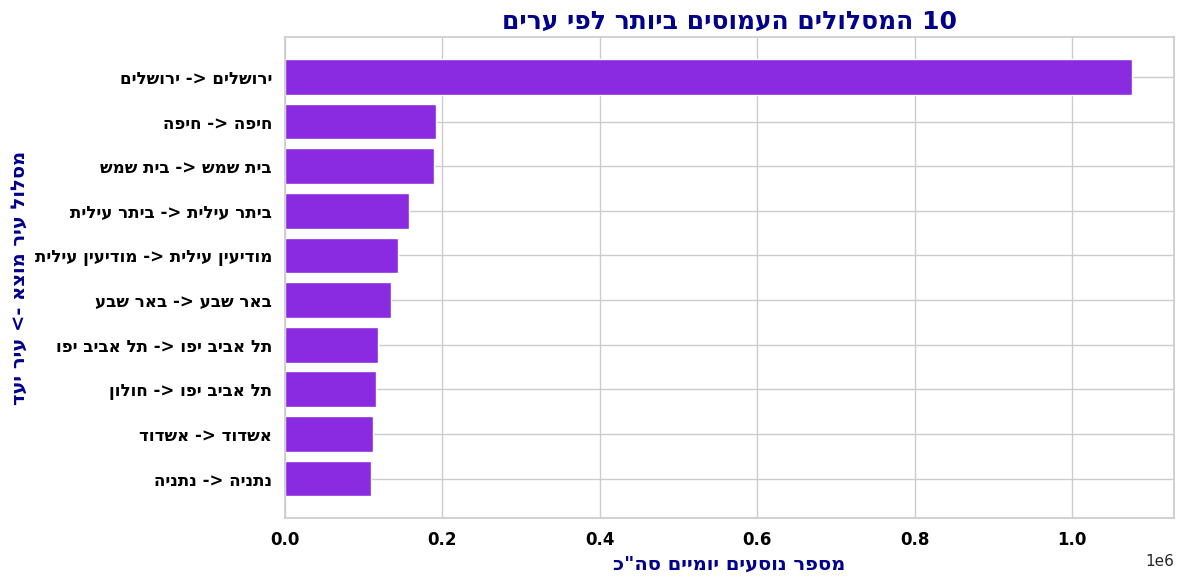

In [89]:
# Summing passenger counts for each origin-destination city pairing
busiest_routes = PublicTransitRoutesData.groupby(['OriginCityName', 'DestinationCityName'])['DailyPassengers'].sum().sort_values(ascending=False)

# Reverse the Hebrew text for the Bidi algorithm
busiest_routes_df = busiest_routes.head(10).reset_index()  # Convert to DataFrame for easier manipulation
busiest_routes_df['OriginCityName'] = busiest_routes_df['OriginCityName'].apply(get_display)
busiest_routes_df['DestinationCityName'] = busiest_routes_df['DestinationCityName'].apply(get_display)

# Create a column for city pairings in the format "Origin -> Destination"
busiest_routes_df['CityPair'] = busiest_routes_df['OriginCityName'] + ' -> ' + busiest_routes_df['DestinationCityName']

# Reverse the order to plot largest at the top (sorted descending for barh)
busiest_routes_df = busiest_routes_df.sort_values(by='DailyPassengers', ascending=True)

# Plot a horizontal bar chart of the top 10 busiest routes, sorted largest to smallest
plt.figure(figsize=(12, 6))
plt.barh(busiest_routes_df['CityPair'], busiest_routes_df['DailyPassengers'], color='#8A2BE2')  # Dark purple color

# Add title and labels with enhanced fonts
plt.title(get_display('10 המסלולים העמוסים ביותר לפי ערים'), fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel(get_display('מספר נוסעים יומיים סה"כ'), fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel(get_display('מסלול עיר מוצא -> עיר יעד'), fontsize=14, fontweight='bold', color='darkblue')

# Rotate x-axis labels for better readability
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')

# Adjust layout for cleaner look
plt.tight_layout()

# Show the chart
plt.show()

**Observation for Busiest Routes by City Pairings Based on Daily Passengers:**

- The **Jerusalem to Jerusalem** route is by far the busiest route with the highest number of daily passengers, significantly surpassing all other routes. This indicates that intra-city transport within Jerusalem dominates daily ridership.

- **Haifa to Haifa** and **Beit Shemesh to Beit Shemesh** are the next busiest routes, which suggests high intra-city travel demand in these cities as well.

- Routes like **Beitar Illit to Beitar Illit** and **Modi'in Illit to Modi'in Illit** also feature prominently, indicating that these smaller cities have concentrated daily travel needs, likely reflecting local commuting patterns.

- **Tel Aviv-Yafo to Tel Aviv-Yafo** and **Holon to Tel Aviv-Yafo** indicate strong inter-city commuting between nearby areas, particularly to and from Tel Aviv, the country's central business hub.

This analysis highlights that both intra-city routes within major cities and inter-city connections between nearby urban centers, such as Tel Aviv and Holon, are key contributors to daily transportation demand.

**busiest routes by city pairings (origin vs. destination) by weekly passengers**

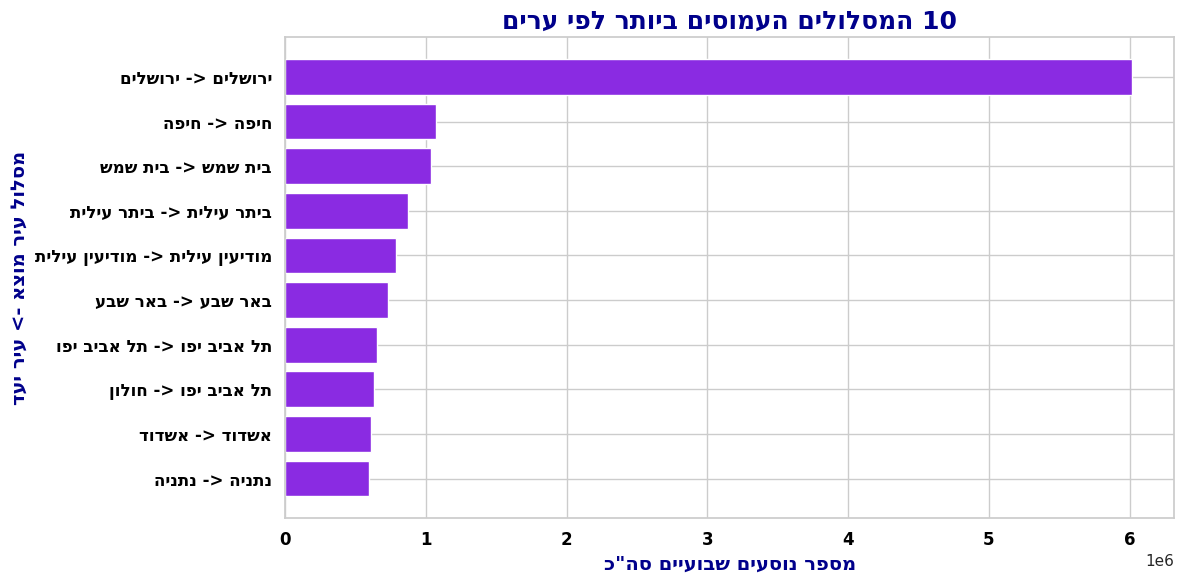

In [90]:
# Summing passenger counts for each origin-destination city pairing
busiest_routes1 = PublicTransitRoutesData.groupby(['OriginCityName', 'DestinationCityName'])['WeeklyPassengers'].sum().sort_values(ascending=False)

# Reverse the Hebrew text for the Bidi algorithm
busiest_routes_df1 = busiest_routes1.head(10).reset_index()  # Convert to DataFrame for easier manipulation
busiest_routes_df1['OriginCityName'] = busiest_routes_df1['OriginCityName'].apply(get_display)
busiest_routes_df1['DestinationCityName'] = busiest_routes_df1['DestinationCityName'].apply(get_display)

# Create a column for city pairings in the format "Origin -> Destination"
busiest_routes_df1['CityPair'] = busiest_routes_df1['OriginCityName'] + ' -> ' + busiest_routes_df1['DestinationCityName']

# Reverse the order to plot largest at the top (sorted descending for barh)
busiest_routes_df1 = busiest_routes_df1.sort_values(by='WeeklyPassengers', ascending=True)

# Plot a horizontal bar chart of the top 10 busiest routes, sorted largest to smallest
plt.figure(figsize=(12, 6))
plt.barh(busiest_routes_df1['CityPair'], busiest_routes_df1['WeeklyPassengers'], color='#8A2BE2')  # Dark purple color

# Add title and labels with enhanced fonts
plt.title(get_display('10 המסלולים העמוסים ביותר לפי ערים'), fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel(get_display('מספר נוסעים שבועיים סה"כ'), fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel(get_display('מסלול עיר מוצא -> עיר יעד'), fontsize=14, fontweight='bold', color='darkblue')

# Rotate x-axis labels for better readability
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')

# Adjust layout for cleaner look
plt.tight_layout()

# Show the chart
plt.show()

**Observation for Busiest Routes by City Pairings Based on Weekly Passengers:**

- Similar to the daily passenger trends, the **Jerusalem to Jerusalem** route remains the busiest route by weekly passengers, showing the overwhelming dominance of intra-city travel in Jerusalem.

- **Haifa to Haifa** and **Beit Shemesh to Beit Shemesh** follow as other highly frequented routes, indicating significant intra-city transportation needs in these cities as well.

- Routes such as **Beitar Illit to Beitar Illit** and **Modi'in Illit to Modi'in Illit** continue to show high weekly ridership, reflecting consistent demand within smaller, densely populated areas.

- **Tel Aviv-Yafo to Tel Aviv-Yafo** and **Holon to Tel Aviv-Yafo** indicate strong inter-city weekly travel, particularly around the business and economic hub of Tel Aviv.

This analysis demonstrates that intra-city routes, especially within major cities, dominate the transportation network in terms of weekly passenger volumes, with significant inter-city travel between nearby cities also contributing to high ridership.

**busiest routes by city pairings (origin vs. destination) by all passengers from january to june 2024**

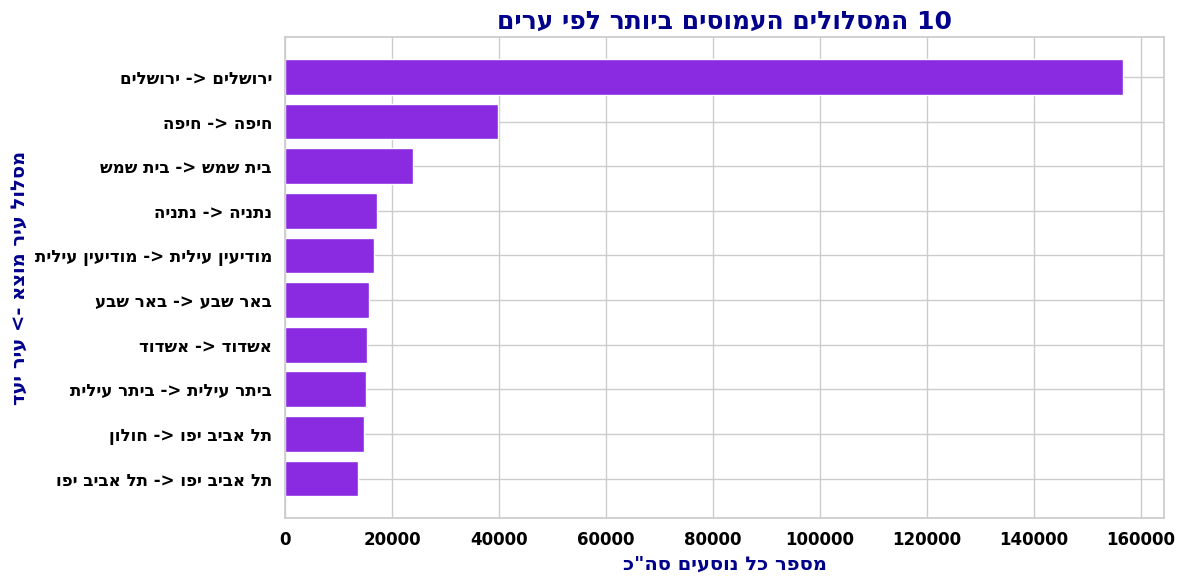

In [91]:
# Summing passenger counts for each origin-destination city pairing
busiest_routes2 = BusPassengerTimeSlots.groupby(['OriginCityName', 'DestinationCityName'])['Passengers'].sum().sort_values(ascending=False)

# Reverse the Hebrew text for the Bidi algorithm
busiest_routes_df2 = busiest_routes2.head(10).reset_index()  # Convert to DataFrame for easier manipulation
busiest_routes_df2['OriginCityName'] = busiest_routes_df2['OriginCityName'].apply(get_display)
busiest_routes_df2['DestinationCityName'] = busiest_routes_df2['DestinationCityName'].apply(get_display)

# Create a column for city pairings in the format "Origin -> Destination"
busiest_routes_df2['CityPair'] = busiest_routes_df2['OriginCityName'] + ' -> ' + busiest_routes_df2['DestinationCityName']

# Reverse the order to plot largest at the top (sorted descending for barh)
busiest_routes_df2 = busiest_routes_df2.sort_values(by='Passengers', ascending=True)

# Plot a horizontal bar chart of the top 10 busiest routes, sorted largest to smallest
plt.figure(figsize=(12, 6))
plt.barh(busiest_routes_df2['CityPair'], busiest_routes_df2['Passengers'], color='#8A2BE2')  # Dark purple color

# Add title and labels with enhanced fonts
plt.title(get_display('10 המסלולים העמוסים ביותר לפי ערים'), fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel(get_display('מספר כל נוסעים סה"כ'), fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel(get_display('מסלול עיר מוצא -> עיר יעד'), fontsize=14, fontweight='bold', color='darkblue')

# Rotate x-axis labels for better readability
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')

# Adjust layout for cleaner look
plt.tight_layout()

# Show the chart
plt.show()

**Observation for Busiest Routes by City Pairings Based on Total Passengers (January to June 2024):**

- **Jerusalem to Jerusalem** dominates as the busiest route, with a significantly higher passenger count compared to all other routes, indicating a high demand for intra-city transportation in Jerusalem.
  
- **Haifa to Haifa** and **Beit Shemesh to Beit Shemesh** are also prominent in the list, showcasing the importance of local travel in these cities, similar to what is seen in the weekly and daily analyses.

- Inter-city routes like **Netanya to Netanya**, **Modi'in Illit to Modi'in Illit**, and **Beitar Illit to Beitar Illit** suggest that smaller cities also have a high volume of passengers within their boundaries, emphasizing local commuting.

- **Tel Aviv-Yafo to Tel Aviv-Yafo** appears in the top routes again, demonstrating the constant movement within this major metropolitan area.

- **Ashdod to Ashdod** and **Holon to Tel Aviv-Yafo** show strong inter-city and intra-city connectivity, highlighting the significance of these cities as key transport hubs.

This analysis shows that major cities, especially Jerusalem, dominate passenger transport both within the city and to nearby cities, while smaller cities also have significant internal transport needs.

## **Passenger Demand & Efficiency**

### **How does the number of passengers correlate with operating costs?**

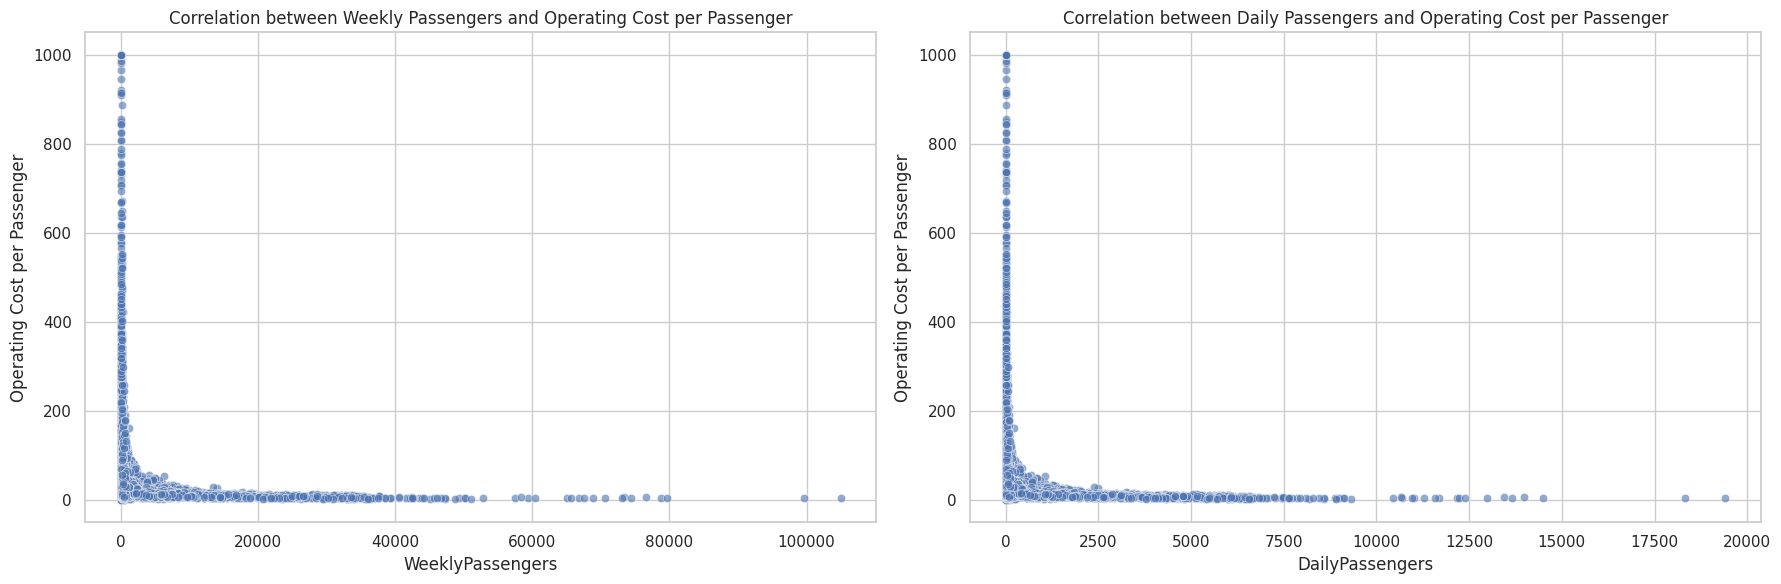

In [92]:
# List of passenger types to iterate over
types = ['WeeklyPassengers', 'DailyPassengers']

# Create subplots: 1 row, 2 columns (one plot per type)
fig, ax = plt.subplots(1, 2, figsize=(18, 6))  # Adjusted for 2 plots side by side

# Iterate through the passenger types and plot them on corresponding axes
for i, col in enumerate(types):
    sns.scatterplot(data=PublicTransitRoutesData, x=col, y="OperatingCostPerPassenger", alpha=0.6, ax=ax[i])
    ax[i].set_title(f"Correlation between {col.split('Passengers')[0] +' '+'Passengers'} and Operating Cost per Passenger")
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Operating Cost per Passenger")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()



**Observation for Passenger Demand & Efficiency:**

- **There is a clear inverse relationship** between the number of passengers (both weekly and daily) and the operating cost per passenger. As the number of passengers increases, the cost per passenger significantly decreases.
  
- **Higher passenger volumes** result in a lower cost per passenger, indicating that buses running at full or higher capacity are more cost-efficient.

- **For routes with very low passenger counts**, the operating cost per passenger is extremely high. This reflects inefficiency when buses are running with fewer passengers, increasing the cost burden on each passenger.

- **The trend flattens out** as passenger numbers rise, indicating that once a certain passenger threshold is reached, the cost per passenger stabilizes at a low value.

This analysis suggests that increasing passenger numbers, especially on underutilized routes, could lead to substantial cost efficiencies.

### **Which routes have the highest average trip durations?**

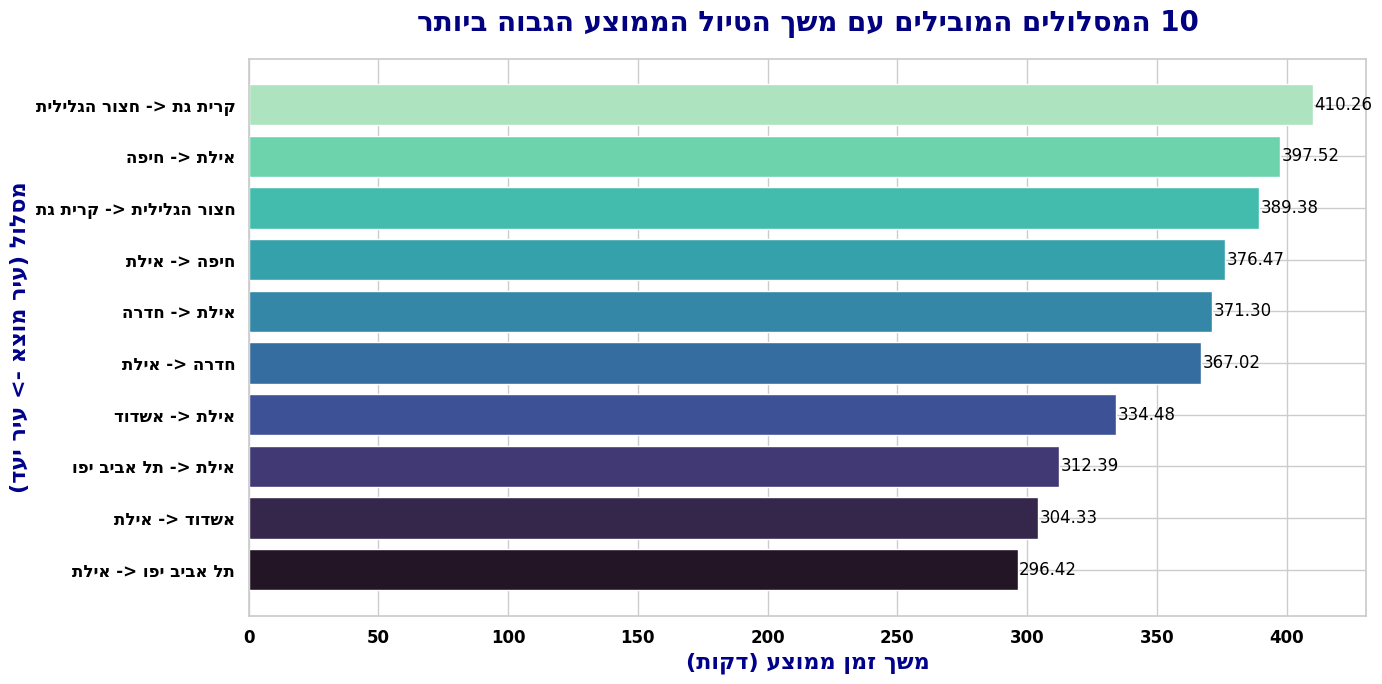

In [93]:
# Group by Origin and Destination cities, and calculate the top 10 average trip durations
top_trip_durations = PublicTransitRoutesData.groupby(['OriginCityName', 'DestinationCityName'])["AverageTripDuration"].mean().nlargest(11).reset_index()
top_trip_durations = top_trip_durations[top_trip_durations['OriginCityName'] != 'עין קנייא']
# Reverse the Hebrew text using the Bidi algorithm for proper display
top_trip_durations['OriginCityName'] = top_trip_durations['OriginCityName'].apply(get_display)
top_trip_durations['DestinationCityName'] = top_trip_durations['DestinationCityName'].apply(get_display)

# Create a new column to display the route as "Origin -> Destination"
top_trip_durations['CityPair'] = top_trip_durations['OriginCityName'] + ' -> ' + top_trip_durations['DestinationCityName']

# Sort values for horizontal bar chart (ascending order for better visualization)
top_trip_durations = top_trip_durations.sort_values(by='AverageTripDuration', ascending=True)

# Define a custom color palette using Seaborn
colors = sns.color_palette("mako", n_colors=10)  # "mako" is a beautiful gradient blue palette

# Plot the horizontal bar chart
plt.figure(figsize=(14, 7))
bars = plt.barh(top_trip_durations['CityPair'], top_trip_durations['AverageTripDuration'], color=colors)

# Add title and axis labels with enhanced fonts and colors
plt.title(get_display('10 המסלולים המובילים עם משך הטיול הממוצע הגבוה ביותר'),
          fontsize=20, fontweight='bold', color='navy', pad=20)
plt.xlabel(get_display('משך זמן ממוצע (דקות)'), fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel(get_display('מסלול (עיר מוצא -> עיר יעד)'), fontsize=16, fontweight='bold', color='darkblue')

# Customize the tick labels for better readability
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')

# Add values at the end of each bar
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=12, color='black')

# Adjust layout for a cleaner appearance
plt.tight_layout()

# Show the chart
plt.show()


**Observation for Top Routes by Average Trip Duration:**

- **The route "קרית גת -> חצור הגלילית"** has the longest average trip duration, taking approximately 410 minutes, which is roughly 6 hours and 50 minutes. This might be due to the long distance between these cities.
  
- **Other long routes include** "אילת -> חיפה" (approximately 397 minutes) and "חצור הגלילית -> קרית גת" (around 389 minutes), indicating significant distances between these city pairs.

- **Eilat (אילת)** is involved in several long-duration routes, reflecting its geographical location far from most major cities in Israel. Routes like "חיפה -> אילת" and "אילת -> חדרה" also show long trip durations, over 300 minutes.

- **The shortest among these top 10 long routes** is "תל אביב יפו -> אילת," which takes around 296 minutes (~5 hours), still indicating a long journey.

This analysis highlights that routes involving **Eilat** and northern cities like **קרית גת** or **חצור הגלילית** tend to have the longest average trip durations. These long durations suggest that these are routes spanning large geographical distances across Israel.

### **What is the Distrubution of Average Buses Categories Rides per weekly/daily?**

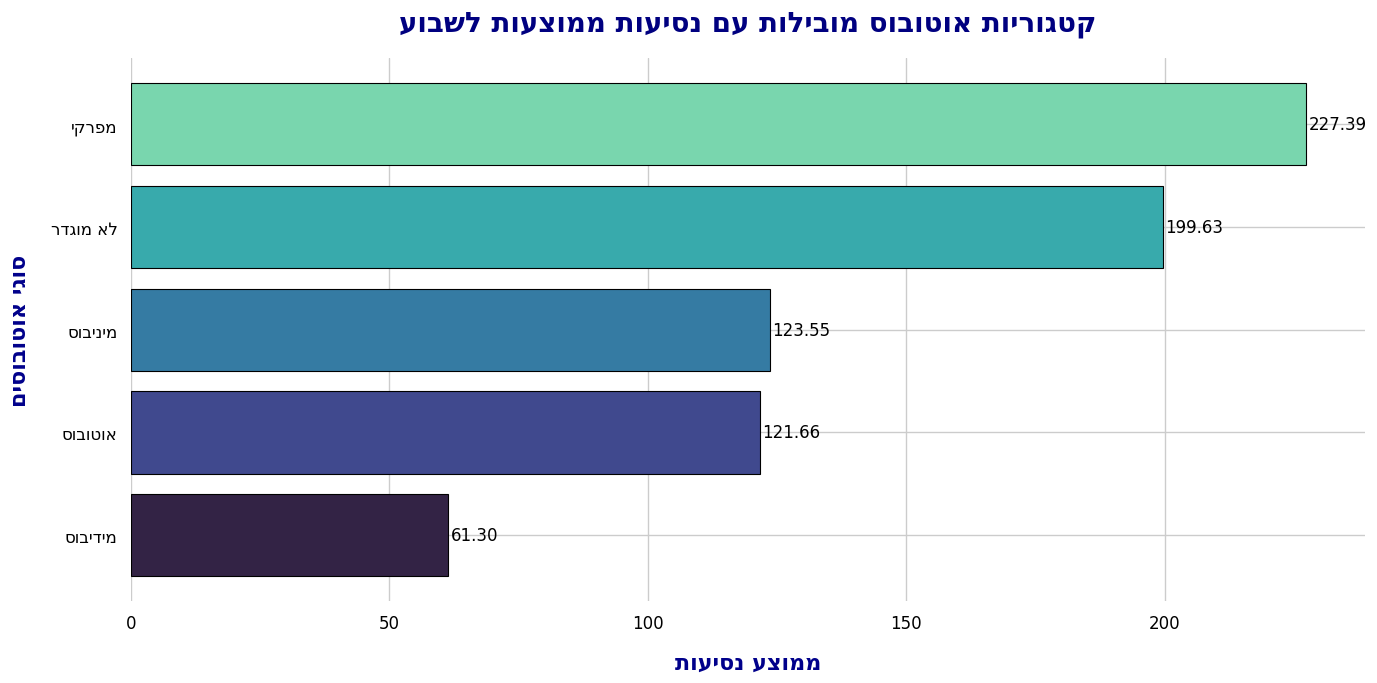

In [94]:
# Create a new column with operating cost per ride
PublicTransitRoutesData['OperatingCost/RidingNumbers'] = (
    PublicTransitRoutesData["OperatingCostPerPassenger"] / PublicTransitRoutesData['WeekyRides']
)

# Group by 'BusSize' and calculate the mean of 'OperatingCost/RidingNumbers'
top_costs = PublicTransitRoutesData.groupby('BusSize')["WeekyRides"].mean().reset_index()

# Apply get_display to the 'BusSize' column to handle Hebrew text (if needed)
top_costs['BusSize'] = top_costs['BusSize'].apply(get_display)

# Sort values in ascending order for better visualization
top_costs = top_costs.sort_values(by='WeekyRides', ascending=True)

# Define a custom color palette using Seaborn
colors = sns.color_palette("mako", n_colors=len(top_costs))  # "mako" gives a smooth gradient

# Set up the figure and axis using seaborn's style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the horizontal bar chart with rounded edges
bars = ax.barh(top_costs['BusSize'], top_costs['WeekyRides'], color=colors, edgecolor='black', linewidth=0.8)

# Add title and axis labels with enhanced fonts and colors
ax.set_title(get_display('קטגוריות אוטובוס מובילות עם נסיעות ממוצעות לשבוע'),
             fontsize=20, fontweight='bold', color='navy', pad=20)
ax.set_xlabel(get_display('ממוצע נסיעות'), fontsize=16, fontweight='bold', color='darkblue', labelpad=15)
ax.set_ylabel(get_display('סוגי אוטובוסים'), fontsize=16, fontweight='bold', color='darkblue', labelpad=15)

# Customize tick labels for better readability
ax.tick_params(axis='x', labelsize=12, labelcolor='black')
ax.tick_params(axis='y', labelsize=12, labelcolor='black')

# Add values at the end of each bar with rounded values for better presentation
for bar in bars:
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
            f'{bar.get_width():.2f}', va='center', ha='left', fontsize=12, color='black')

# Remove unnecessary chart borders for a cleaner look
sns.despine(left=True, bottom=True)

# Adjust layout to avoid overlaps and improve appearance
plt.tight_layout()

# Show the final chart
plt.show()


**Observation for Bus Categories Weekly Rides:**

- **Mפרקי (Articulated buses)** lead with the highest average weekly rides at approximately **227.39** rides, which makes sense given their larger capacity and use on high-demand routes.

- **Not defined buses** follow with around **199.63** rides, indicating there may be routes where bus size is not clearly specified but still experience significant usage.

- **Minibuses** and **regular buses** have similar average weekly rides, around **123.55** and **121.66** respectively, indicating they cater to steady passenger demand.

- **Midibuses** have the lowest average weekly rides, around **61.30**, suggesting they might be used on less frequent or lower-demand routes.

This analysis shows that **articulated buses** are primarily used on routes with higher demand, while **midibuses** are reserved for less busy routes.

**Bus Categories Daily Rides**

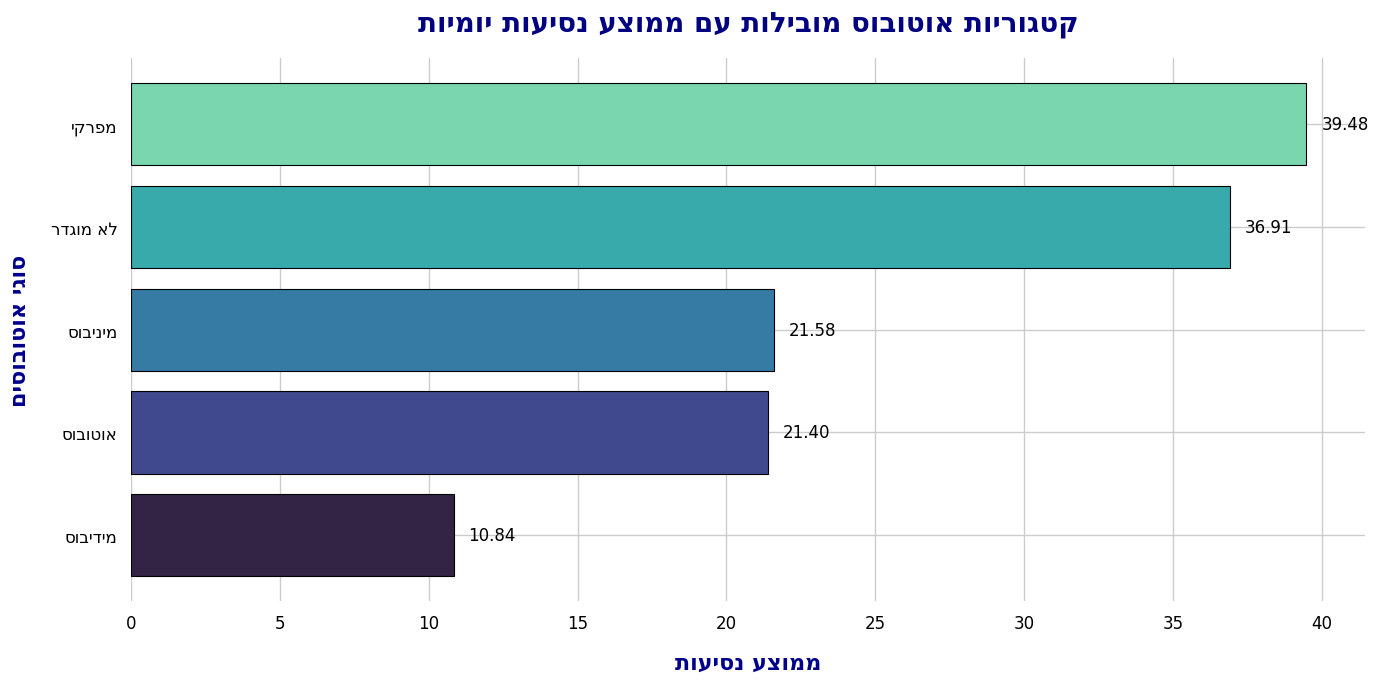

In [95]:
# Create a new column with operating cost per ride
PublicTransitRoutesData['OperatingCost/RidingNumbers'] = (
    PublicTransitRoutesData["OperatingCostPerPassenger"] / PublicTransitRoutesData['WeekyRides']
)

# Group by 'BusSize' and calculate the mean of 'OperatingCost/RidingNumbers'
top_costs = PublicTransitRoutesData.groupby('BusSize')["DailyRides(Tuesday)"].mean().reset_index()

# Apply get_display to the 'BusSize' column to handle Hebrew text (if needed)
top_costs['BusSize'] = top_costs['BusSize'].apply(get_display)

# Sort values in ascending order for better visualization
top_costs = top_costs.sort_values(by='DailyRides(Tuesday)', ascending=True)

# Define a custom color palette using Seaborn
colors = sns.color_palette("mako", n_colors=len(top_costs))  # "mako" gives a smooth gradient

# Set up the figure and axis using seaborn's style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the horizontal bar chart with rounded edges
bars = ax.barh(top_costs['BusSize'], top_costs['DailyRides(Tuesday)'], color=colors, edgecolor='black', linewidth=0.8)

# Add title and axis labels with enhanced fonts and colors
ax.set_title(get_display('קטגוריות אוטובוס מובילות עם ממוצע נסיעות יומיות'),
             fontsize=20, fontweight='bold', color='navy', pad=20)
ax.set_xlabel(get_display('ממוצע נסיעות'), fontsize=16, fontweight='bold', color='darkblue', labelpad=15)
ax.set_ylabel(get_display('סוגי אוטובוסים'), fontsize=16, fontweight='bold', color='darkblue', labelpad=15)

# Customize tick labels for better readability
ax.tick_params(axis='x', labelsize=12, labelcolor='black')
ax.tick_params(axis='y', labelsize=12, labelcolor='black')

# Add values at the end of each bar with rounded values for better presentation
for bar in bars:
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
            f'{bar.get_width():.2f}', va='center', ha='left', fontsize=12, color='black')

# Remove unnecessary chart borders for a cleaner look
sns.despine(left=True, bottom=True)

# Adjust layout to avoid overlaps and improve appearance
plt.tight_layout()

# Show the final chart
plt.show()


**Observation for Bus Categories Daily Rides:**

- **Articulated buses (מפרקי)** have the highest average daily rides at **39.48**, indicating that these buses are heavily utilized on a daily basis due to their large capacity and deployment on busy routes.
  
- **Not defined buses (לא מוגדר)** come next with **36.91** daily rides, showing that routes with unspecified bus types still experience significant daily activity.

- **Minibuses** and **regular buses** both have average daily rides of around **21.58** and **21.40** respectively, suggesting a consistent usage pattern for these smaller bus types on moderate-demand routes.

- **Midibuses** show the lowest average daily rides at **10.84**, implying their use is concentrated on lower-demand or more specialized routes.

This analysis demonstrates that **articulated buses** and **undefined bus categories** are consistently deployed more frequently on high-demand routes, while **midibuses** are used less frequently.

## **Route Particular Distrubution**

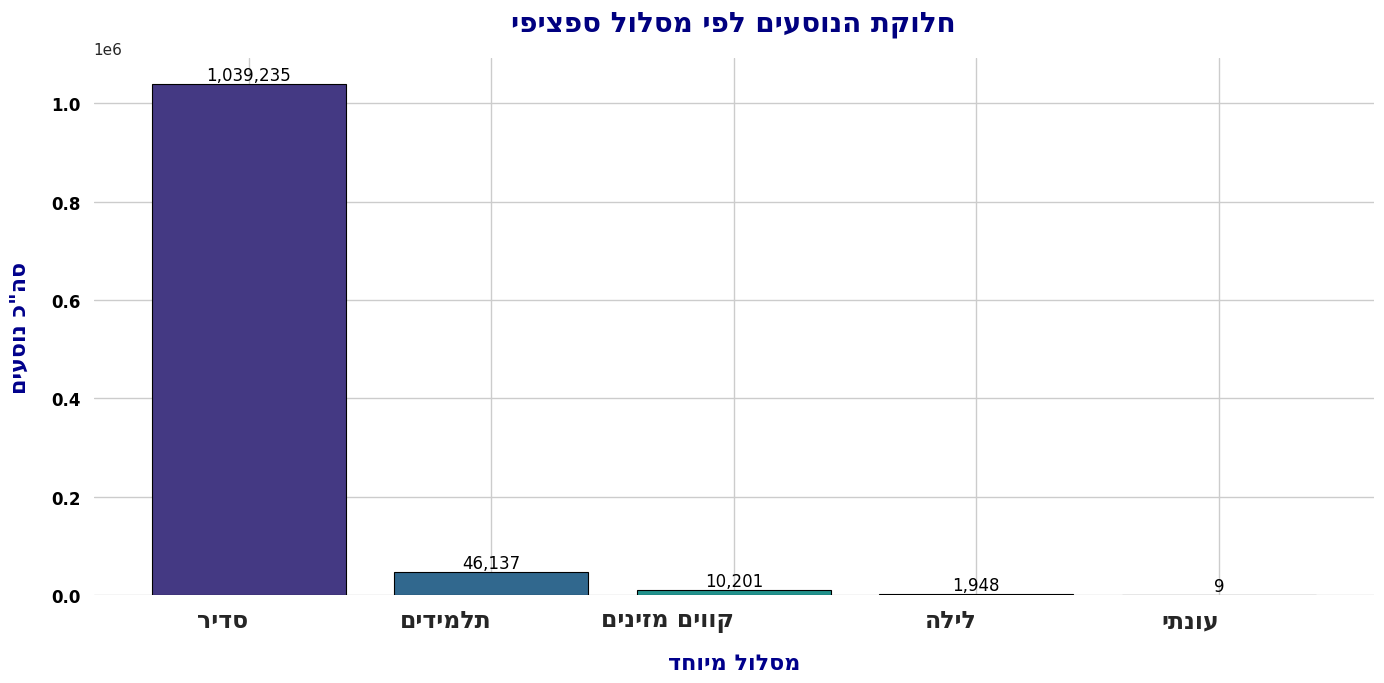

In [96]:
# Group by 'RouteParticular' and sum the 'Passengers'
route_passenger_dist = BusPassengerTimeSlots.groupby('RouteParticular')['Passengers'].sum().reset_index()
#transform to hebrew :
route_passenger_dist['RouteParticular'] = route_passenger_dist['RouteParticular'].apply(get_display)

# Sort the values by 'Passengers' for better visualization
route_passenger_dist = route_passenger_dist.sort_values(by='Passengers', ascending=False)

# Define a color palette using Seaborn
colors = sns.color_palette("viridis", n_colors=len(route_passenger_dist))

# Set up the figure and axis using Seaborn style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the bar chart
bars = ax.bar(route_passenger_dist['RouteParticular'], route_passenger_dist['Passengers'],
              color=colors, edgecolor='black', linewidth=0.8)

# Add title and axis labels with enhanced fonts and colors
ax.set_title(get_display('חלוקת הנוסעים לפי מסלול ספציפי'), fontsize=20, fontweight='bold', color='navy', pad=20)
ax.set_xlabel(get_display('מסלול מיוחד'), fontsize=16, fontweight='bold', color='darkblue', labelpad=15)
ax.set_ylabel(get_display('סה"כ נוסעים'), fontsize=16, fontweight='bold', color='darkblue', labelpad=15)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0, ha='right', fontsize=17, fontweight='bold')

# Customize the y-axis tick labels
plt.yticks(fontsize=12, fontweight='bold', color='black')

# Add values at the top of each bar for better insight
for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100,
            f'{int(bar.get_height()):,}', ha='center', va='bottom', fontsize=12, color='black')

# Remove unnecessary borders for a cleaner look
sns.despine(left=True, bottom=True)

# Adjust layout to avoid overlap and ensure a clean appearance
plt.tight_layout()

# Show the final plot
plt.show()


**Observation for Route Particular Distribution:**

- **Regular routes (סדיר)** dominate the distribution, accounting for over **1 million** passengers, far surpassing other route types. This highlights that regular, scheduled routes are by far the most heavily utilized.
  
- **Student routes (תלמידים)** are the second most significant, with **46,137** passengers, indicating consistent demand for transportation services dedicated to students.

- **Special service lines (קווים מזינים)** see a much smaller share, with **10,201** passengers, likely serving niche or localized areas.

- **Night routes (לילה)** account for **1,948** passengers, showing limited but specific demand for night-time transportation.

- **Seasonal routes (עונתי)** have the lowest number of passengers, with only **9** recorded, indicating that these routes are highly specialized and only operate under certain conditions.

This analysis confirms that regular routes serve the largest share of passengers, while specialized routes, such as night and seasonal routes, have significantly lower demand.

## **Trends by Agency:**

In [97]:
# Group by 'AgencyName' to get total passengers and count of routes
agency_passenger_data =BusPassengerTimeSlots.groupby('AgencyName').agg(
    TotalPassengers=('Passengers', 'sum'),  # Sum of passengers per agency
    RouteCount=('RouteID', 'nunique')  # Count of unique routes per agency
).reset_index()

# Sort by total passengers for better visualization
agency_passenger_data = agency_passenger_data.sort_values(by='TotalPassengers', ascending=False)

# Display the data for verification
print(agency_passenger_data.head())

# Verify the data before plotting
print(agency_passenger_data[['AgencyName', 'TotalPassengers', 'RouteCount']])

# Ensure data is sorted correctly for plotting
agency_passenger_data = agency_passenger_data.sort_values(by='TotalPassengers', ascending=False)

# Prepare correct labels using Bidi algorithm
correct_labels = [get_display(label) for label in agency_passenger_data['AgencyName']]

   AgencyName  TotalPassengers  RouteCount
0         אגד         292802.0         634
26      קווים         123726.3         436
22  מטרופולין         115271.9         343
8          דן         109812.6          88
25    סופרבוס          84515.8         212
                             AgencyName  TotalPassengers  RouteCount
0                                   אגד         292802.0         634
26                                קווים         123726.3         436
22                            מטרופולין         115271.9         343
8                                    דן         109812.6          88
25                              סופרבוס          84515.8         212
1                         אלקטרה אפיקים          66303.1         176
4                        אקסטרה ירושלים          41924.7          60
2                  אלקטרה אפיקים תחבורה          38682.3         137
10                             דן בדרום          38498.9         128
24                          נתיב אקספרס          296

### **How do passenger numbers vary by agency?**

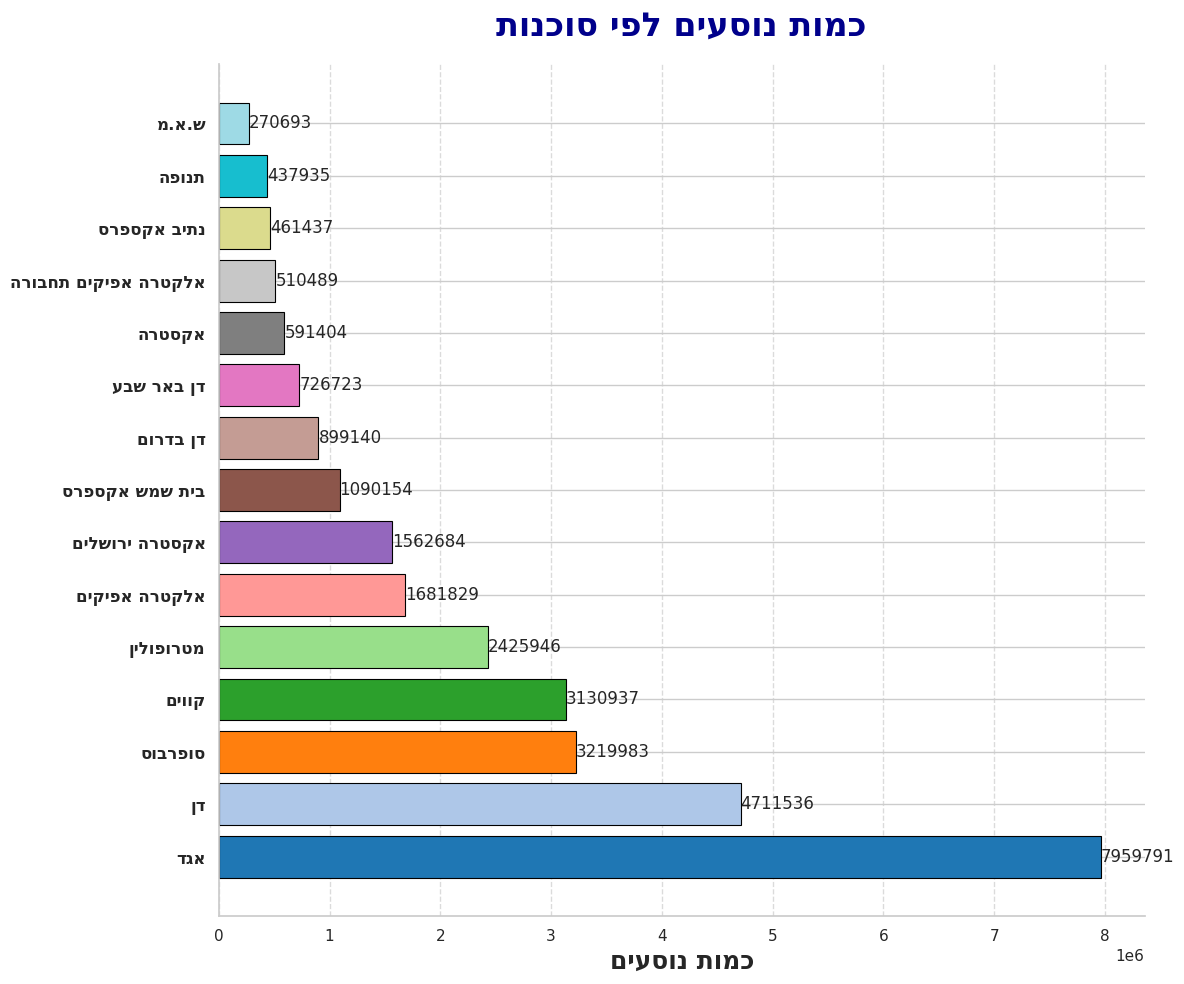

In [98]:
# Calculate total passengers and route count by agency
agency_passenger_data = PublicTransitRoutesData.groupby('AgencyName').agg(
    TotalPassengers=('WeeklyPassengers', 'sum'),  # Sum of weekly passengers per agency
    RouteCount=('RouteID', 'nunique')  # Count of unique routes per agency
).reset_index()

# Sort the data by TotalPassengers in descending order
agency_passenger_data = agency_passenger_data.sort_values(by='TotalPassengers', ascending=False)

# Take only the top agencies with the most passengers
top_agencies = agency_passenger_data.head(15)

# Prepare correct labels using Bidi algorithm for Hebrew display
correct_labels = [get_display(label) for label in top_agencies['AgencyName']]

# Define a color palette for better visuals
colors = plt.cm.tab20(np.linspace(0, 1, len(top_agencies)))

# Create the figure and axis for the bar chart
fig, ax1 = plt.subplots(figsize=(12, 10))  # Larger size for better visibility

# Horizontal bar chart with styling
bars = ax1.barh(
    top_agencies['AgencyName'],
    top_agencies['TotalPassengers'],
    color=colors, edgecolor='black', linewidth=0.8
)

# Add value labels to each bar
for bar in bars:
    width = bar.get_width()
    ax1.text(
        width + 10, bar.get_y() + bar.get_height() / 2,
        f'{int(width)}', va='center', ha='left', fontsize=12
    )

# Customize the y-axis labels for better alignment and size
ax1.set_yticklabels(correct_labels, fontweight='bold', fontsize=12)

# Set title and axis labels with Bidi for Hebrew
plt.title(
    get_display('כמות נוסעים לפי סוכנות'),
    fontsize=24, fontweight='bold', color='darkblue', pad=20
)
plt.xlabel(get_display('כמות נוסעים'), fontsize=18, fontweight='bold')
plt.ylabel('')  # Remove y-axis label for cleaner design

# Remove unnecessary spines for a cleaner look
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Add gridlines for better readability
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**Observation for Agency Passenger Numbers:**

- **אגד** is the dominant agency, serving nearly **8 million** passengers, which makes it the most significant transportation provider by far.
  
- **דן** follows, serving close to **4.7 million** passengers, showcasing its substantial impact in terms of transportation.

- **סופרבוס** and **קווים** also show considerable passenger volumes, with **3.2 million** and **3.1 million** passengers respectively.

- **מטרופולין** is another notable agency, transporting around **2.4 million** passengers.

- Other agencies such as **אלקטרה אפיקים**, **אקסטרה**, and **בית שמש אקספרס** transport fewer passengers but still contribute significantly to the overall network.

This analysis highlights that the top few agencies, particularly אגד and דן, are responsible for the majority of passenger transportation, while smaller agencies still provide essential services to more localized regions.

### **Which agency handles the highest number of routes and passengers?**

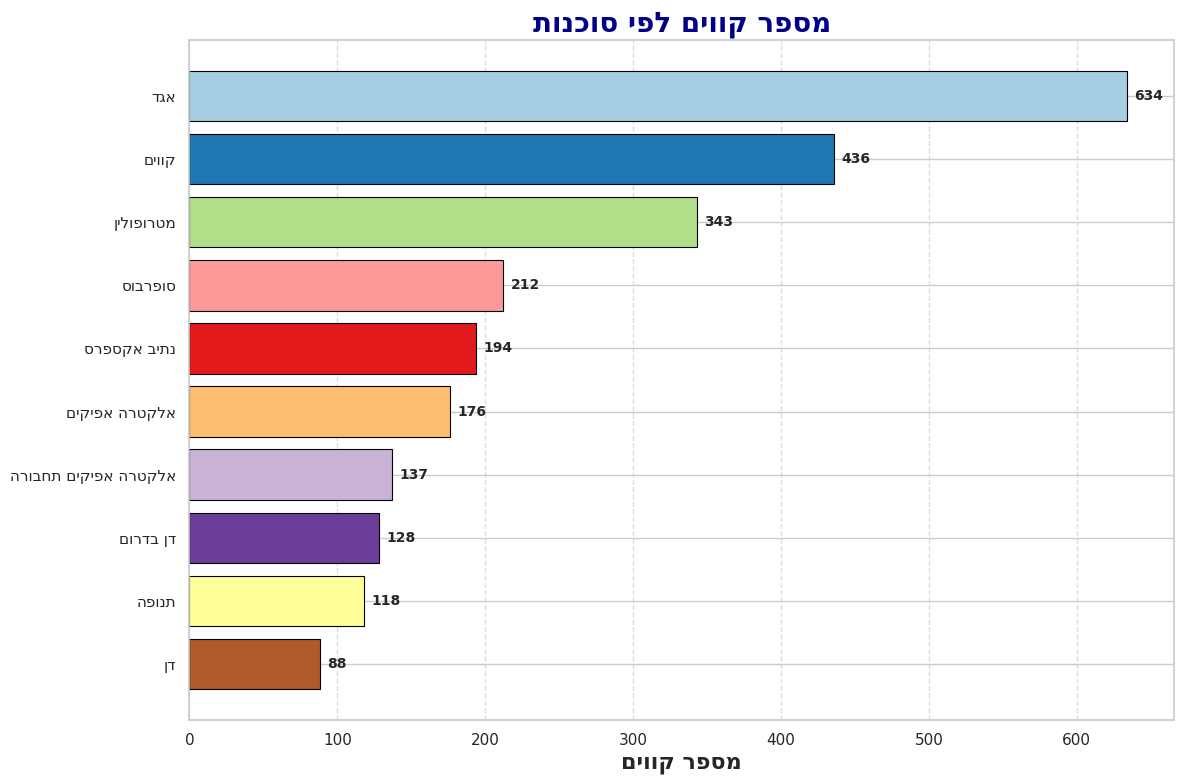

In [99]:
# Sort data by RouteCount in descending order to have the largest at the bottom
sorted_data = agency_passenger_data.sort_values(ascending=False, by='RouteCount').head(10)

# Ensure agency names are displayed correctly in Hebrew (RTL)
correct_labels = [get_display(label) for label in sorted_data['AgencyName']]

# Define a color palette for better visuals (use a close color gradient)
colors = plt.cm.Paired(np.linspace(0, 1, len(sorted_data)))

# Create the figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Horizontal bar plot with custom colors (largest on the bottom)
bars = ax.barh(correct_labels, sorted_data['RouteCount'], color=colors, edgecolor='black', linewidth=0.8)

# Add labels next to each bar
for bar in bars:
    width = bar.get_width()
    ax.text(width + 5, bar.get_y() + bar.get_height() / 2, f'{int(width)}',
            va='center', fontsize=10, fontweight='bold')

# No need to reverse the axis since we're sorting it in ascending order
# Invert the y-axis to ensure the largest bars are at the bottom
ax.invert_yaxis()

# Set title and axis labels with correct direction
plt.title(get_display('מספר קווים לפי סוכנות'), fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel(get_display('מספר קווים'), fontsize=16, fontweight='bold')

# Add gridlines for readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**Observation for Agency Route Count:**

- **אגד** handles the highest number of routes with **634** lines, indicating its dominance in the transportation network.
  
- **קווים** follows, managing **436** routes, which also signifies a major share in route handling.

- **מטרופולין** operates **343** routes, placing it among the top agencies in terms of route count.

- **סופרבוס** and **נתיב אקספרס** manage a significant number of routes, with **212** and **194** lines respectively.

- **אלקטרה אפיקים** and **דן בדרום** handle a notable number of routes, while **דן** operates a slightly smaller number of lines, around **88**.

This data suggests that **אגד** and **קווים** are not only key players in terms of passenger numbers but also lead in managing the highest number of routes, supporting a wide geographical coverage.

## **Service and Bus Type Comparison:**

In [100]:
# Group by ServiceType to get total weekly passengers
service_passenger_data_weekly = PublicTransitRoutesData.groupby('ServiceType').agg(
    TotalPassengers=('WeeklyPassengers', 'sum')
).reset_index()

# Group by BusType to get total weekly passengers
bus_type_passenger_data_weekly = PublicTransitRoutesData.groupby('BusType').agg(
    TotalPassengers=('WeeklyPassengers', 'sum')
).reset_index()

# Display the data for verification
print(service_passenger_data_weekly)
print(bus_type_passenger_data_weekly)


         ServiceType  TotalPassengers
0               ישיר         607701.4
1               מאסף        3655052.2
2               מהיר         740885.0
3         מקומי מאסף       24865401.5
4  עירוני עורקי מאסף         608407.8
5  עירוני עורקי מהיר         129761.9
               BusType  TotalPassengers
0            בינעירוני        4700294.6
1  בינעירוני ממוגן אבן         193120.4
2  בינעירוני ממוגן ירי          68273.2
3               עירוני       25645521.6


### **How does service type (local, express) affect passenger counts?**


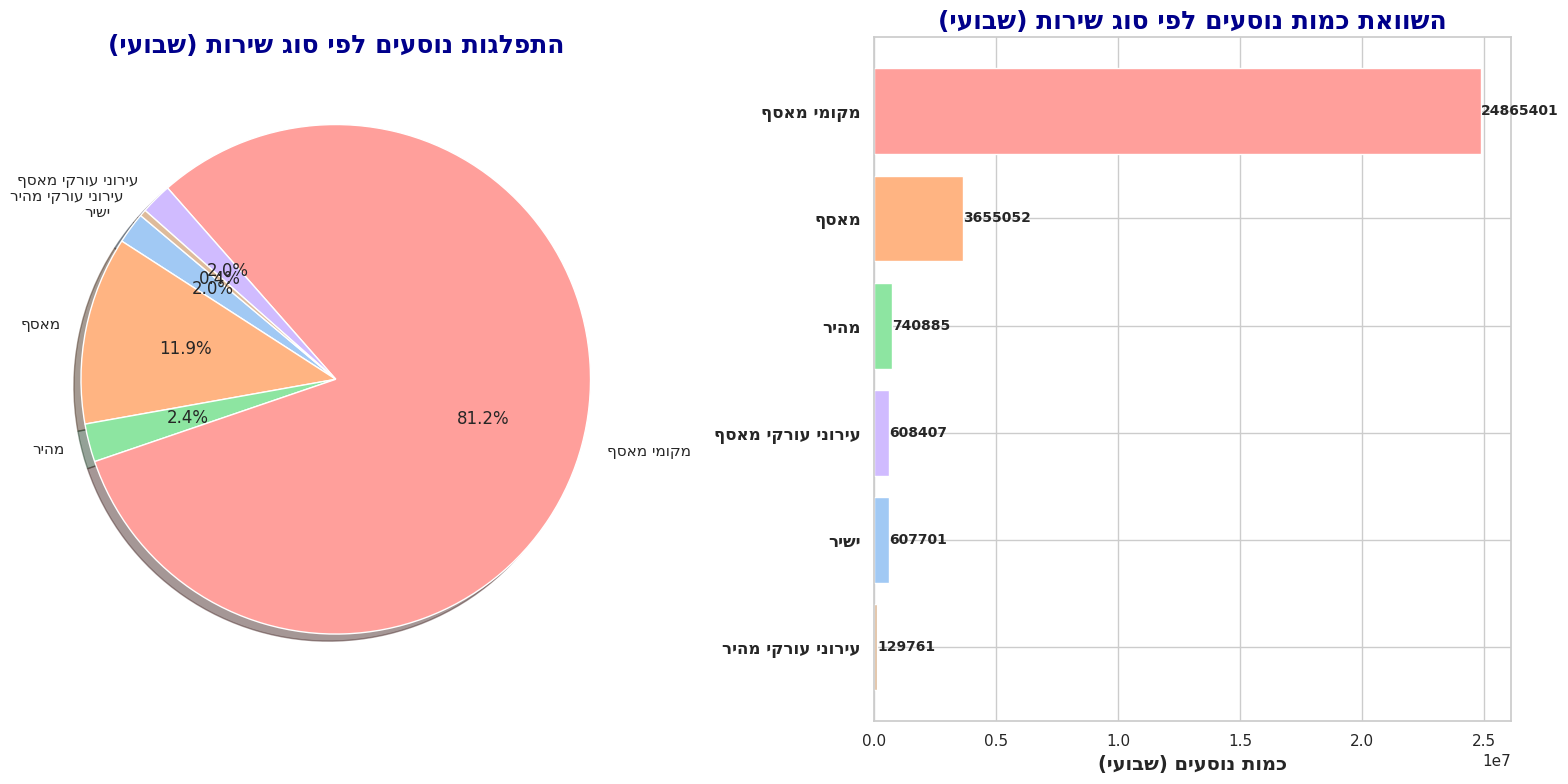

In [101]:
# Define consistent colors for each ServiceType using a dictionary
service_types = service_passenger_data_weekly['ServiceType'].unique()
colors_dict = dict(zip(service_types, sns.color_palette('pastel', len(service_types))))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart on the left
wedges, texts, autotexts = ax1.pie(
    service_passenger_data_weekly['TotalPassengers'],
    labels=[get_display(label) for label in service_passenger_data_weekly['ServiceType']],
    autopct='%1.1f%%', startangle=140,
    colors=[colors_dict[st] for st in service_passenger_data_weekly['ServiceType']],
    shadow=True
)
ax1.set_title(get_display('התפלגות נוסעים לפי סוג שירות (שבועי)'), fontsize=18, fontweight='bold', color='darkblue')

# Horizontal bar chart on the right
sorted_data = service_passenger_data_weekly.sort_values(by='TotalPassengers')
bars = ax2.barh(
    sorted_data['ServiceType'], sorted_data['TotalPassengers'],
    color=[colors_dict[st] for st in sorted_data['ServiceType']]
)

# Adjust y-axis labels for Hebrew rendering
ax2.set_yticks(range(len(sorted_data)))
ax2.set_yticklabels([get_display(label) for label in sorted_data['ServiceType']], fontsize=12, fontweight='bold')

# Add numeric labels next to each bar
for bar in bars:
    width = bar.get_width()
    ax2.text(
        width + 50, bar.get_y() + bar.get_height() / 2,
        f'{int(width)}', va='center', fontsize=10, fontweight='bold'
    )

# Customize the bar chart
ax2.set_xlabel(get_display('כמות נוסעים (שבועי)'), fontsize=14, fontweight='bold')
ax2.set_title(get_display('השוואת כמות נוסעים לפי סוג שירות (שבועי)'), fontsize=18, fontweight='bold', color='darkblue')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


**Observation for Service Type Analysis (Weekly):**

- **81.2% of passengers** use **מקומי מאסף** (Local Collector), making it the most commonly used service type by a wide margin. This suggests that local collector services dominate public transportation usage.

- **מאסף** (Collector) follows, with **11.9%** of the total weekly passengers, indicating that other regional collector routes also contribute significantly to passenger movement.

- **מהיר** (Express) accounts for **2.4%** of passengers, suggesting that express services are used less frequently compared to collector services.

- **ישיר** (Direct) and **עירוני עורקי מאסף** (Urban Trunk Collector) services each make up around **2%** of weekly passengers.

This analysis highlights the critical importance of collector services, particularly local collector routes, in supporting the majority of passenger demand.

### **Is there any difference in passenger counts between different bus types (e.g., articulated vs. standard)?**

In [102]:
# Group by BusType to get total weekly passengers
bus_type_passenger_data_weekly = PublicTransitRoutesData.groupby('BusType').agg(
    TotalPassengers=('WeeklyPassengers', 'sum')
).reset_index()

# Display the data for verification
print(bus_type_passenger_data_weekly)


               BusType  TotalPassengers
0            בינעירוני        4700294.6
1  בינעירוני ממוגן אבן         193120.4
2  בינעירוני ממוגן ירי          68273.2
3               עירוני       25645521.6


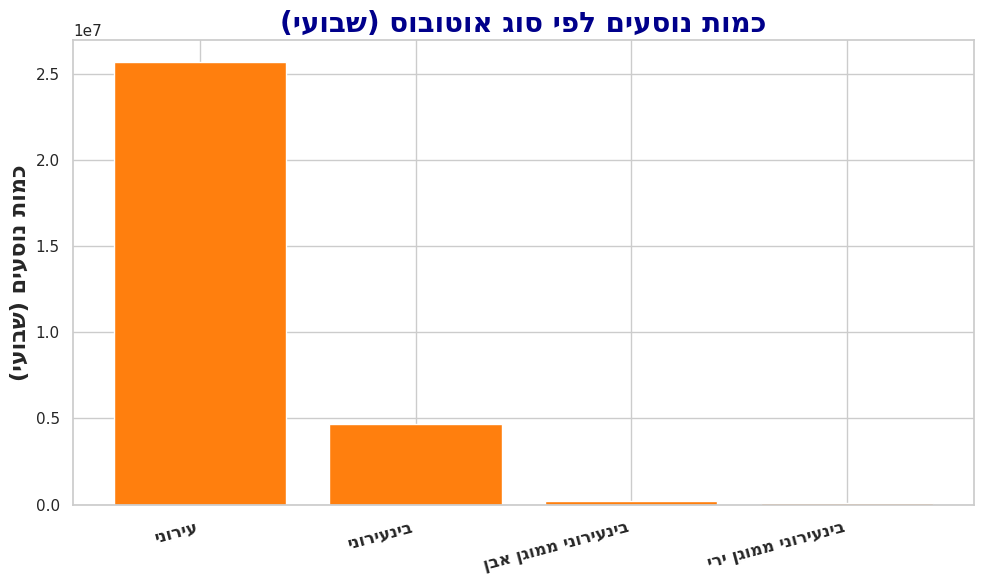

In [103]:
# Sort the bus_type_passenger_data_weekly by TotalPassengers in descending order
sorted_bus_type_data = bus_type_passenger_data_weekly.sort_values(by='TotalPassengers', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart using the sorted data
ax.bar(sorted_bus_type_data['BusType'], sorted_bus_type_data['TotalPassengers'], color='#ff7f0e')

# Adjust x-axis labels with slight rotation for better readability
bus_labels = [get_display(label) for label in sorted_bus_type_data['BusType']]
ax.set_xticks(range(len(bus_labels)))
ax.set_xticklabels(bus_labels, rotation=15, ha='right', fontsize=12, fontweight='bold')

# Set title and y-axis label with Bidi for Hebrew
plt.title(get_display('כמות נוסעים לפי סוג אוטובוס (שבועי)'), fontsize=20, fontweight='bold', color='darkblue')
plt.ylabel(get_display('כמות נוסעים (שבועי)'), fontsize=16, fontweight='bold')

# Optimize layout and display plot
plt.tight_layout()
plt.show()


**Observation for Bus Type Analysis (Weekly):**

- **Urban buses** (עירוני) handle the vast majority of passengers, with over **25.6 million** weekly passengers, making them the most commonly used bus type in public transportation.

- **Intercity buses** (בינעירוני) serve significantly fewer passengers, around **4.7 million**, indicating that while intercity routes are important, they account for a smaller proportion of overall passenger traffic compared to urban routes.

- **Specialized intercity buses** such as **bulletproof** buses (ממוגן אבן) and **armored buses** (ממוגן ירי) handle the least number of passengers, with only **193,120** and **68,273** passengers, respectively. This reflects their specific use cases, likely serving high-risk or specialized routes.

The data reveals a clear preference for urban buses, which likely reflects higher usage in densely populated areas, while specialized and intercity buses cater to more specific travel needs.

## Passenger Distribution Heatmap

### **How does the passenger count vary across hours and days (heatmap)?**

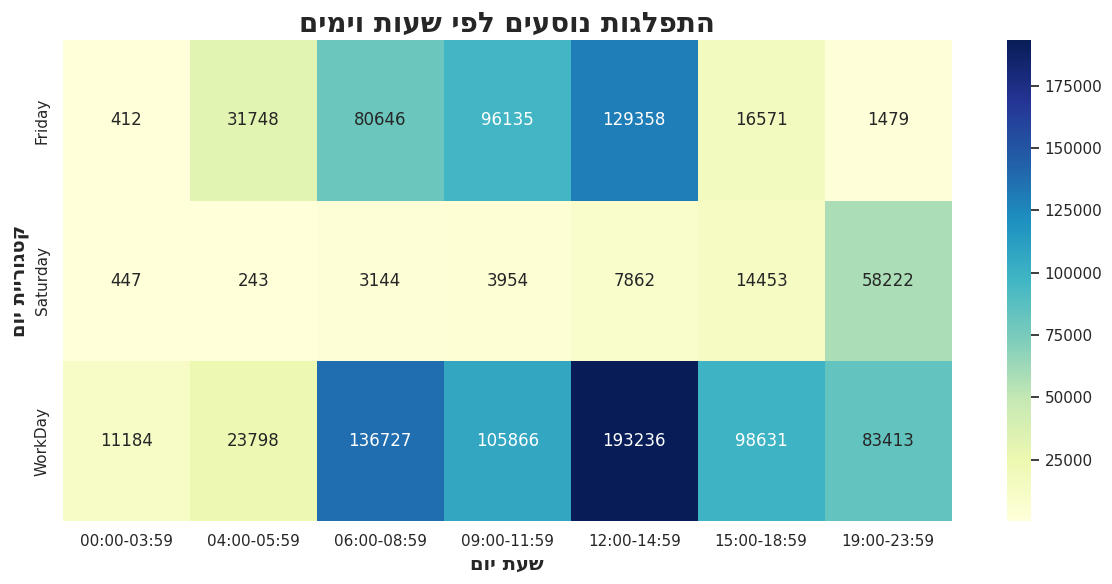

In [104]:
# Pivot the data to create a heatmap (rows: days, columns: hours)
heatmap_data = BusPassengerTimeSlots.pivot_table(
    index='Category', columns='TimeSlot', values='Passengers', aggfunc='sum'
)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')

plt.title(get_display('התפלגות נוסעים לפי שעות וימים'), fontsize=20, fontweight='bold')
plt.xlabel(get_display('שעת יום'), fontsize=14, fontweight='bold')
plt.ylabel(get_display('קטגוריית יום'), fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


**Observation for Passenger Distribution by Day and Hour (Heatmap):**

- **Workdays** between **12:00-14:59** see the highest number of passengers across all day-hour categories, likely due to peak midday travel during lunch breaks or errands.
  
- **Workdays** between **06:00-08:59** also see high passenger counts, corresponding to the morning rush hour, as people commute to work or school.

- **Fridays** show the highest passenger activity between **09:00-14:59**, reflecting that people still commute or run errands before the early start of the weekend.

- **Saturday** shows much lower activity, especially during early morning hours, as expected. Passenger counts start picking up later in the day, particularly from **19:00-23:59**, when people might be traveling for leisure activities.

This heatmap illustrates that **workdays**, especially during **midday and morning hours**, have the most consistent demand, whereas **Saturdays** exhibit the lowest activity. **Fridays** show a transition, with fewer passengers compared to workdays but still considerable movement until the afternoon.

## Agency Passenger Distribution Pie Chart

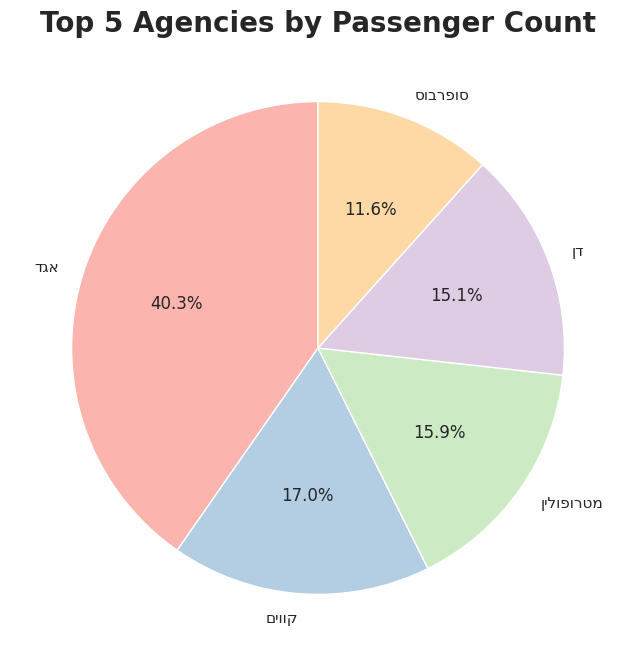

In [105]:
from matplotlib import cm

# Get the top 5 agencies by passenger count
top_agencies = BusPassengerTimeSlots.groupby('AgencyName')['Passengers'].sum().nlargest(5)

# Reverse the labels to display Hebrew correctly
labels = [get_display(label) for label in top_agencies.index]

# Generate colors from a colormap
colors = cm.Pastel1(range(len(top_agencies)))

# Plot the pie chart with corrected labels
plt.figure(figsize=(8, 8))
plt.pie(top_agencies, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

plt.title(get_display('Top 5 Agencies by Passenger Count'), fontsize=20, fontweight='bold')
plt.ylabel('')  # Remove y-axis label for clarity
plt.show()


**Observations from the Agency Passenger Distribution Pie Chart:**

1. **אגד (Egged)**:
   - Egged dominates the public transportation scene, handling **40.3%** of the total passengers, making it the largest public transportation provider among the top five agencies.

2. **קווים (Kavim)**:
   - As the second-largest agency, Kavim accounts for **17.0%** of the total passenger count, indicating its significant role in managing public transport routes.

3. **מטרופולין (Metropoline)**:
   - Metropoline holds **15.9%** of the total passenger share, placing it closely behind Kavim in terms of passenger volume.

4. **דן (Dan)**:
   - Dan, which services the central region, manages **15.1%** of the total passengers, reflecting its importance in urban transport networks.

5. **סופרבוס (Superbus)**:
   - Superbus, while still among the top five agencies, handles the smallest share of the total passengers, at **11.6%**.

**Key Insight:**
- The public transportation sector is heavily concentrated, with **Egged** alone handling nearly half of the total passenger volume. The other four agencies, while significant, collectively manage the remaining **59.7%** of the passengers.

This analysis highlights the dominance of specific agencies in Israel's public transport system, with Egged playing a particularly large role.

## Seasonal Passenger Trends

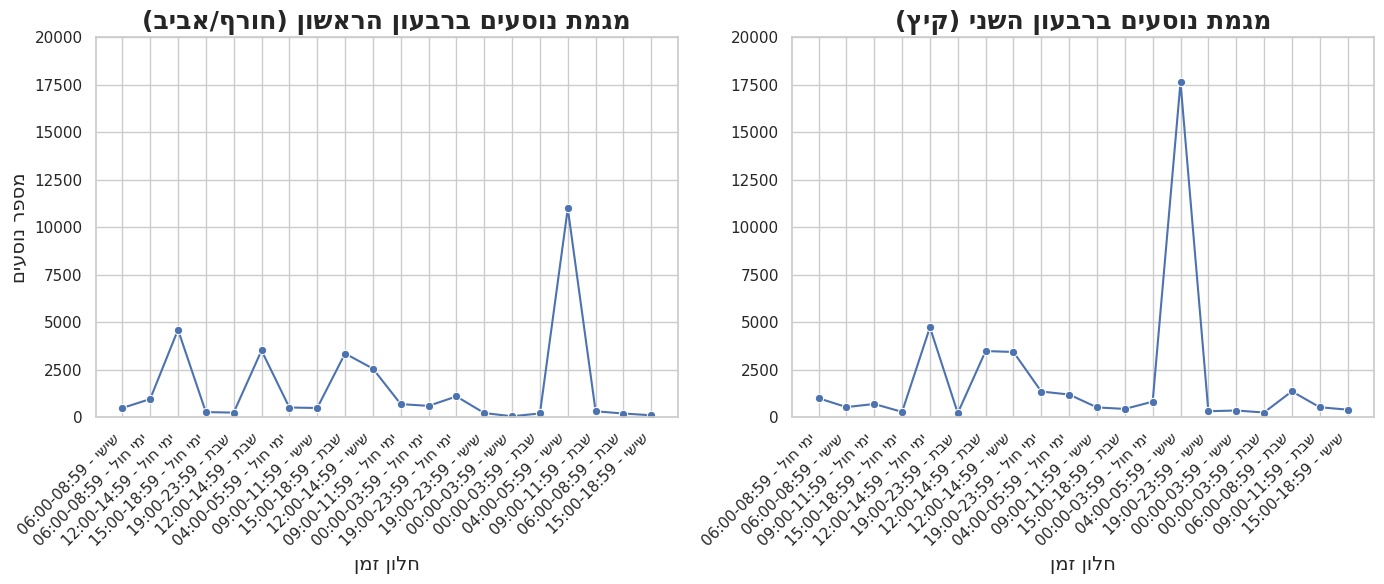

In [106]:
# Assuming PublicTransitRoutesData is your dataset, filter data by quarter
q1_data = PublicTransitRoutesData[PublicTransitRoutesData['Q'] == 1]
q2_data = PublicTransitRoutesData[PublicTransitRoutesData['Q'] == 2]

# Fix the Hebrew x-axis tick labels
q1_data['FormattedTimeSlot'] = q1_data['MaxRidership'].apply(get_display)
q2_data['FormattedTimeSlot'] = q2_data['MaxRidership'].apply(get_display)

# Set y-axis max to 20,000 for both subplots
max_passengers = 20000

# Prepare the plot
plt.figure(figsize=(14, 6))

# Plot for Q1 (Winter/Spring)
plt.subplot(1, 2, 1)
sns.lineplot(data=q1_data, x='FormattedTimeSlot', y='WeeklyPassengers', marker='o', ci=None)
plt.title(get_display('מגמת נוסעים ברבעון הראשון (חורף/אביב)'), fontsize=18, fontweight='bold')
plt.xlabel(get_display('חלון זמן'), fontsize=14)
plt.ylabel(get_display('מספר נוסעים'), fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max_passengers)  # Set y-axis limit

# Plot for Q2 (Summer)
plt.subplot(1, 2, 2)
sns.lineplot(data=q2_data, x='FormattedTimeSlot', y='WeeklyPassengers', marker='o', ci=None)
plt.title(get_display('מגמת נוסעים ברבעון השני (קיץ)'), fontsize=18, fontweight='bold')
plt.xlabel(get_display('חלון זמן'), fontsize=14)
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max_passengers)  # Set y-axis limit

plt.tight_layout()
plt.show()


**Observations from the Seasonal Trend Plots:**

1. **First Quarter (Winter/Spring)**:
   - **Peaks**:
     - Passenger count spikes on **Friday** between **06:00-08:59** and **15:00-18:59**, indicating higher commuter activity, possibly due to work or school travel.
     - A noticeable peak also occurs on **Saturday** between **06:00-08:59**, which could suggest early morning travelers or weekend plans.
   - **Low Activity**:
     - There are consistent low passenger counts during the nighttime and early morning hours on weekdays and weekends.

2. **Second Quarter (Summer)**:
   - **Peaks**:
     - The most significant peak occurs on **Friday** between **00:00-03:59**, indicating a possible increase in leisure or travel activities during the summer period.
     - Other notable increases happen on **Friday** between **09:00-11:59**, likely due to more daytime travel during the weekend.
   - **Low Activity**:
     - Nighttime and early morning hours still see minimal passenger counts, similar to the first quarter.

**Seasonal Differences:**
- In the **second quarter (Summer)**, there is a notable increase in passengers during the **early morning and late-night hours**, likely due to summer events, holidays, and vacation periods.
- In contrast, the **first quarter** shows a steadier pattern of commuter-based travel, especially around typical work hours (morning and afternoon peaks).
